# Amazon Reviews - Building Recommendation System

### *Comparison of Collaborative Filtering, Popularity-based Models for Amazon Electronics Dataset*

- Submitted by: Kovendhan V
- PGP.AIML.O.JUN20B.Group4

**Domain:** E-commerce

**Data Description:**

*Data columns:* First three columns are `userId`, `productId`, and `ratings` and the fourth column is `timestamp`. You can discard the timestamp column as in this case you may not need to use it.

**Source:** 

Amazon Reviews data (http://jmcauley.ucsd.edu/data/amazon/) The repository has several datasets. For this case study, we are using the Electronics dataset.

**Learning Outcomes:**

- Exploratory Data Analysis
- Data Wrangling
- Build a Popularity recommender model
- Build Collaborative Filtering model

**Objective:**

To make a recommendation system that recommends at least five new products based on the user's habits.

1. Read and explore the given dataset. ( Rename column/add headers, plot
histograms, find data characteristics) ( 3 Marks)
2. Take a subset of the dataset to make it less sparse/ denser. ( For example,
keep the users only who has given 50 or more number of ratings ) -(5 Marks)
3. Build Popularity Recommender model. ( 15 marks)
4. Split the data randomly into a train and test dataset. ( For example, split it in
70/30 ratio) ( 2 marks)
5. Build Collaborative Filtering model. ( 20 marks)
6. Evaluate the above model. ( Once the model is trained on the training data, it
can be used to compute the error (like RMSE) on predictions made on the test
data.) You can also use a different method to evaluate the models. ( 5 marks)
7. Get top - K ( K = 5) recommendations. Since our goal is to recommend new
products to each user based on his/her habits, we will recommend 5 new
products. ( 10 marks)
8. Summarise your insights. ( 10 marks)

### Project Roadmap:

**Step 1: Import the necessary Libraries**

**Step 2: Load the dataset**

**Step 3: Exploratory Data Analysis & Feature Engineering**

**Step 4: Split the dataset into Train & Test set for Model Building**

**Step 5: Build Popularity Based Recommender Model**

**Step 6: Build Collaborative Filtering Based Recommender Model**

    - Matrix Factorization method - Singuar Value Decomposition
    - KNN With Means Model (User-user based)
    - KNN With Means Model (Item-item based)
    - Cross Validation, Hyperparameter Tuning & Model Evaluation for all the Models

**Step 7: Comparison of Recommendations from different Models**

    - Comparison of RMSE Score 
    - Comparison of top N recommendations for a sample user by all the three models

**Step 8: Learnings and Summary**

## Step 1: Import the necessary Libraries

In [1]:
#Numerical Calculations
import numpy as np 
import pandas as pd
from scipy.stats import norm, zscore

#Data Visualization
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cm
plt.style.use('ggplot')
import seaborn as sns

from sklearn import set_config
set_config(display='diagram')

#Feature Engineering and Data Preprocessing
from surprise import Dataset, Reader, dump

#Model Selection
from surprise.model_selection import train_test_split, cross_validate, GridSearchCV, cross_validate, KFold
from sklearn.model_selection import train_test_split as tts_sklearn

#Model Building - Recommenders
from surprise import SVD
from surprise import KNNBaseline, KNNBasic, KNNWithMeans, KNNWithZScore

#Model Evaluation
from surprise import accuracy
from sklearn.metrics import mean_squared_error

#Misc
import os
import warnings
from collections import defaultdict
warnings.filterwarnings('ignore')
random_state = 24
np.random.seed(random_state)

## Step 2: Load the dataset

In [2]:
ratings = pd.read_csv('ratings_Electronics.csv', verbose=False)

#Checking the shape of the dataset
print('No of Rows : ', ratings.shape[0])
print('No of Columns : ', ratings.shape[1])

No of Rows :  7824481
No of Columns :  4


In [3]:
#Top 5 Rows 
ratings.head()

AKM1MP6P0OYPR  0132793040  5.0  1365811200
0  A2CX7LUOHB2NDG  0321732944  5.0  1341100800
1  A2NWSAGRHCP8N5  0439886341  1.0  1367193600
2  A2WNBOD3WNDNKT  0439886341  3.0  1374451200
3  A1GI0U4ZRJA8WN  0439886341  1.0  1334707200
4  A1QGNMC6O1VW39  0511189877  5.0  1397433600

Dataframe columns are in the order `userId`, `productId`, `ratings` and `timestamp`. Let us name the columns.

In [4]:
ratings.columns = ['userId', 'productId', 'ratings', 'timestamp']

In [5]:
ratings.head()

userId   productId  ratings   timestamp
0  A2CX7LUOHB2NDG  0321732944      5.0  1341100800
1  A2NWSAGRHCP8N5  0439886341      1.0  1367193600
2  A2WNBOD3WNDNKT  0439886341      3.0  1374451200
3  A1GI0U4ZRJA8WN  0439886341      1.0  1334707200
4  A1QGNMC6O1VW39  0511189877      5.0  1397433600

## Step 3: Exploratory Data Analysis & Feature Engineering

Checking the datatypes and null records

In [6]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7824481 entries, 0 to 7824480
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     object 
 1   productId  object 
 2   ratings    float64
 3   timestamp  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 238.8+ MB


In [7]:
ratings.isnull().sum()

userId       0
productId    0
ratings      0
timestamp    0
dtype: int64

**Observations:**

- Totally 7,824,481 rows & 4 columns are there in the dataset
- `ratings` is a numeric column (ordinal data); `userId` and `productId` are of alphanumeric string datatype
- There are no null records in the dataset

Let us convert the `timestamp` column to datetime format.

In [8]:
ratings['timestamp'] = pd.to_datetime(ratings['timestamp'], unit='s')

In [9]:
ratings.head()

userId   productId  ratings  timestamp
0  A2CX7LUOHB2NDG  0321732944      5.0 2012-07-01
1  A2NWSAGRHCP8N5  0439886341      1.0 2013-04-29
2  A2WNBOD3WNDNKT  0439886341      3.0 2013-07-22
3  A1GI0U4ZRJA8WN  0439886341      1.0 2012-04-18
4  A1QGNMC6O1VW39  0511189877      5.0 2014-04-14

Extracting the `year` info from the timestamp

In [10]:
ratings['year'] = ratings['timestamp'].dt.year

In [11]:
ratings.head()

userId   productId  ratings  timestamp  year
0  A2CX7LUOHB2NDG  0321732944      5.0 2012-07-01  2012
1  A2NWSAGRHCP8N5  0439886341      1.0 2013-04-29  2013
2  A2WNBOD3WNDNKT  0439886341      3.0 2013-07-22  2013
3  A1GI0U4ZRJA8WN  0439886341      1.0 2012-04-18  2012
4  A1QGNMC6O1VW39  0511189877      5.0 2014-04-14  2014

#### Ratings over the year - Trend Chart

In [12]:
print('No of years in the dataset are : ', ratings['year'].unique())

No of years in the dataset are :  [2012 2013 2014 2010 2011 2008 2004 2007 2006 2005 2009 2001 2000 2003
 2002 1999 1998]


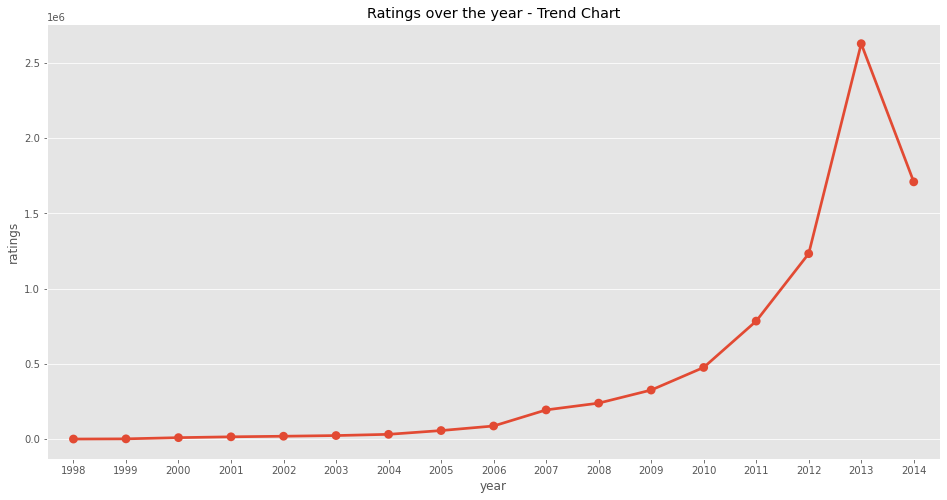

In [13]:
yearwise_ratings = ratings.groupby(by = 'year', as_index = False)['ratings'].count()

plt.figure(figsize = (16, 8))
sns.pointplot(x = 'year', y = 'ratings', data = yearwise_ratings)
plt.title('Ratings over the year - Trend Chart')
plt.show()

**Observations:**
 - Since the dataset has `ratings` of Electronic items, we can clearly see an exponential growth in the number of ratings (also sales) from the year 2006 onwards.
 - Growth has a peak at 2013 and tappered down in 2014.

#### No of Ratings per user

In [14]:
#No of ratings per user 

rating_per_user_count = ratings['userId'].value_counts()
rating_per_user_count = pd.DataFrame(rating_per_user_count).reset_index()
rating_per_user_count.columns = ['userId', 'rating_per_user_count']

ratings = ratings.merge(rating_per_user_count, how = 'left', on = ['userId'])
ratings.head()

userId   productId  ratings  timestamp  year  rating_per_user_count
0  A2CX7LUOHB2NDG  0321732944      5.0 2012-07-01  2012                      4
1  A2NWSAGRHCP8N5  0439886341      1.0 2013-04-29  2013                      1
2  A2WNBOD3WNDNKT  0439886341      3.0 2013-07-22  2013                      1
3  A1GI0U4ZRJA8WN  0439886341      1.0 2012-04-18  2012                      1
4  A1QGNMC6O1VW39  0511189877      5.0 2014-04-14  2014                      2

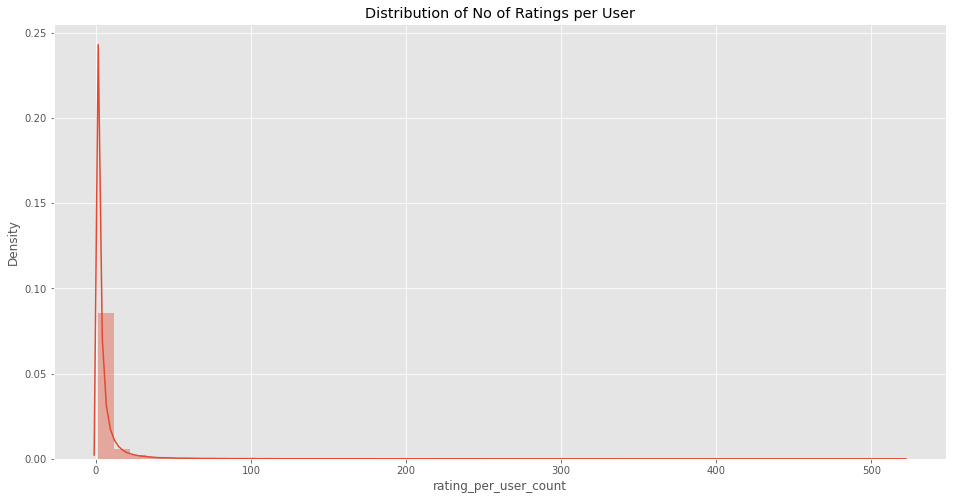

In [15]:
plt.figure(figsize = (16, 8))
sns.distplot(ratings['rating_per_user_count'], bins=50)
plt.title('Distribution of No of Ratings per User')
plt.show()

In [16]:
ratings.describe(include='all').T

count   unique                  top   freq  \
userId                     7824481  4201696        A5JLAU2ARJ0BO    520   
productId                  7824481   476001           B0074BW614  18244   
ratings                7.82448e+06      NaN                  NaN    NaN   
timestamp                  7824481     5489  2014-01-07 00:00:00  18276   
year                   7.82448e+06      NaN                  NaN    NaN   
rating_per_user_count  7.82448e+06      NaN                  NaN    NaN   

                           first       last     mean      std   min   25%  \
userId                       NaT        NaT      NaN      NaN   NaN   NaN   
productId                    NaT        NaT      NaN      NaN   NaN   NaN   
ratings                      NaT        NaT  4.01234  1.38091     1     3   
timestamp             1998-12-04 2014-07-23      NaN      NaN   NaN   NaN   
year                         NaT        NaT  2011.94  2.22214  1998  2011   
rating_per_user_count        NaT        NaT  6.33208  17.5949     1     1   

                        50%   75%   max  
userId                  NaN   NaN   NaN  
productId               NaN   NaN   NaN  
ratings                   5     5     5  
timestamp               NaN   NaN   NaN  
year                   2013  2013  2014  
rating_per_user_count     2     5   520

**Observations:**

- As we can see, the Distribution of Ratings per user is heavily positive skewed, exhibitting sparseness.
- It is advised to take a subset of dataset to get meaningful recommendations.

### Extracting a subset of dataset with No of Ratings > 50

In [17]:
rating_per_user_count = ratings['userId'].value_counts()
ratings_50 = ratings[ratings['userId'].isin(rating_per_user_count[rating_per_user_count >= 50].index)]

In [18]:
ratings_50.describe(include='all').T

count unique                  top freq      first  \
userId                 125871   1540        A5JLAU2ARJ0BO  520        NaT   
productId              125871  48190           B0088CJT4U  206        NaT   
ratings                125871    NaN                  NaN  NaN        NaT   
timestamp              125871   4600  2013-04-05 00:00:00  311 1999-10-11   
year                   125871    NaN                  NaN  NaN        NaT   
rating_per_user_count  125871    NaN                  NaN  NaN        NaT   

                            last     mean      std   min   25%   50%   75%  \
userId                       NaT      NaN      NaN   NaN   NaN   NaN   NaN   
productId                    NaT      NaN      NaN   NaN   NaN   NaN   NaN   
ratings                      NaT  4.26134  1.06214     1     4     5     5   
timestamp             2014-07-23      NaN      NaN   NaN   NaN   NaN   NaN   
year                         NaT   2011.4  2.43794  1999  2010  2012  2013   
rating_per_user_count        NaT  107.991  78.1028    50    60    79   119   

                        max  
userId                  NaN  
productId               NaN  
ratings                   5  
timestamp               NaN  
year                   2014  
rating_per_user_count   520

In [19]:
ratings_50.head()

userId   productId  ratings  timestamp  year  \
93   A3BY5KCNQZXV5U  0594451647      5.0 2014-01-20  2014   
117   AT09WGFUM934H  0594481813      3.0 2013-08-31  2013   
176  A32HSNCNPRUMTR  0970407998      1.0 2011-10-27  2011   
177  A17HMM1M7T9PJ1  0970407998      4.0 2010-08-14  2010   
491  A3CLWR1UUZT6TG  0972683275      5.0 2013-07-12  2013   

     rating_per_user_count  
93                      50  
117                    110  
176                     72  
177                    151  
491                     58

In [20]:
print('Percentage of Ratings retained by >50 filter : ', (ratings_50.shape[0] / ratings.shape[0])*100, '%')

Percentage of Ratings retained by >50 filter :  1.6086817771044495 %


#### Rechecking the distribution of Ratings post the subset operation (checking sparsity)

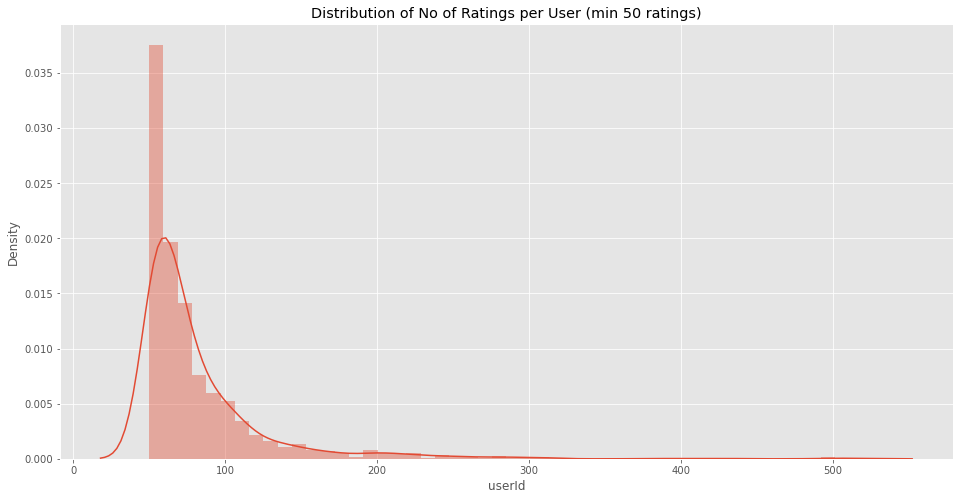

In [21]:
plt.figure(figsize = (16, 8))
sns.distplot(ratings_50['userId'].value_counts(), bins=50)
plt.title('Distribution of No of Ratings per User (min 50 ratings)')
plt.show()

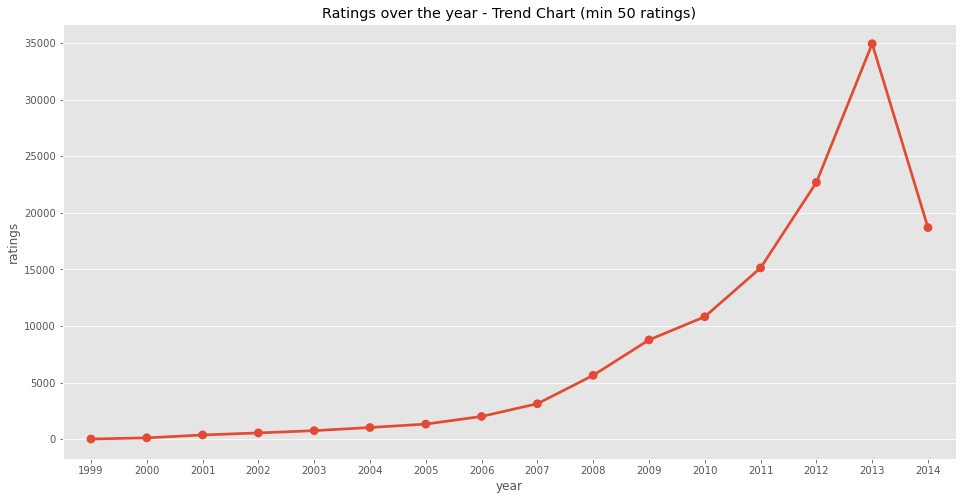

In [22]:
yearwise_ratings_50 = ratings_50.groupby(by = 'year', as_index = False)['ratings'].count()

plt.figure(figsize = (16, 8))
sns.pointplot(x = 'year', y = 'ratings', data = yearwise_ratings_50)
plt.title('Ratings over the year - Trend Chart (min 50 ratings)')
plt.show()

**Observations:**

- Post the subset operation, the sparseness has reduced to some extent.
- Also the Rating count distribution post subset operation hasn't been impacted.

### Exploring `ratings` variable

In [23]:
ratings_50['ratings'].describe()

count    125871.000000
mean          4.261339
std           1.062144
min           1.000000
25%           4.000000
50%           5.000000
75%           5.000000
max           5.000000
Name: ratings, dtype: float64

In [24]:
print('No. of Null Records, if any :')
ratings_50['ratings'].isnull().sum()

No. of Null Records, if any :


0

In [25]:
print('No. of unique Ratings : ')
sorted(list(ratings_50['ratings'].unique()))

No. of unique Ratings : 


[1.0, 2.0, 3.0, 4.0, 5.0]

#### Distribution of each `ratings`

In [26]:
ratings_50['ratings'].value_counts(normalize=True)

5.0    0.564340
4.0    0.256572
3.0    0.095812
2.0    0.042639
1.0    0.040637
Name: ratings, dtype: float64

In [27]:
ratings_50['ratings'].value_counts().sort_index()

1.0     5115
2.0     5367
3.0    12060
4.0    32295
5.0    71034
Name: ratings, dtype: int64

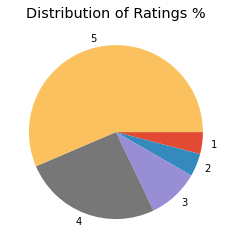

In [28]:
plt.pie(
    x=ratings_50['ratings'].value_counts(normalize=True).sort_index(), 
    labels=[1,2,3,4,5],
    counterclock=False
)
plt.title('Distribution of Ratings %')
plt.show()

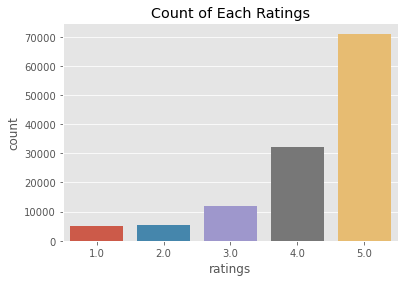

In [29]:
sns.countplot(ratings_50['ratings']).set_title('Count of Each Ratings');

**Observations:**
- Rating 5 has the most number of occurences, this could be due to user's default behaviour/choice too.
- Around 56% of the ratings are of value 5, followed by 26% for rating 4.
- 4% of the ratings are of value 1 and 2 approximately.

### Exploring `userId` variable

In [30]:
print('No of Unique users in the dataset : ')
ratings_50['userId'].nunique()

No of Unique users in the dataset : 


1540

In [31]:
print('Percentage of Unique users in the dataset : ')
ratings_50['userId'].nunique() / ratings_50.shape[0] * 100

Percentage of Unique users in the dataset : 


1.2234748274026583

In [32]:
ratings_50['userId'].unique()

array(['A3BY5KCNQZXV5U', 'AT09WGFUM934H', 'A32HSNCNPRUMTR', ...,
       'AT53ZTTO707MB', 'A1X3ESYZ79H59E', 'A328S9RN3U5M68'], dtype=object)

#### Users with most number of ratings

In [33]:
ratings_50.groupby('userId')['ratings'].count().sort_values(ascending=False).head()  

userId
A5JLAU2ARJ0BO     520
ADLVFFE4VBT8      501
A3OXHLG6DIBRW8    498
A6FIAB28IS79      431
A680RUE1FDO8B     406
Name: ratings, dtype: int64

### Exploring `productId` variable

In [34]:
print('No of Unique Products in the dataset : ')
ratings_50['productId'].nunique()

No of Unique Products in the dataset : 


48190

In [35]:
print('Percentage of Unique Products in the dataset : ')
ratings_50['productId'].nunique() / ratings_50.shape[0] * 100

Percentage of Unique Products in the dataset : 


38.285228527619545

In [36]:
ratings_50['productId'].unique()

array(['0594451647', '0594481813', '0970407998', ..., 'B00LGQ6HL8',
       'B00LI4ZZO8', 'B00LKG1MC8'], dtype=object)

### Summary of Unique Users, Products and Total Ratings

In [37]:
num_unique_users = len(ratings_50['userId'].unique())
num_unique_items = len(ratings_50['productId'].unique())

print("No. of Unique Reviewers: " + str(num_unique_users))
print("No. of Unique Products : " + str(num_unique_items))
print("No. of Ratings  :" + str(len(ratings_50)))

No. of Unique Reviewers: 1540
No. of Unique Products : 48190
No. of Ratings  :125871


## Step 4: Split the dataset into Train & Test set for Model Building

In [38]:
trainset, testset = tts_sklearn(ratings_50, test_size = 0.30, random_state=random_state)
display(trainset.shape,testset.shape)

(88109, 6)

(37762, 6)

## Step 5: Build Popularity Based Recommender Model

### Most popular Products based on Number of Ratings (not mean of ratings)

In [39]:
def topn_popular_products_by_rating_count(topn=5):
    return ratings_50.groupby('productId')['ratings'].count().sort_values(ascending=False).head(topn)

In [40]:
print('Top 10 Popular Products based on Number of Ratings recorded')
topn_popular_products_by_rating_count(10)

Top 10 Popular Products based on Number of Ratings recorded


productId
B0088CJT4U    206
B003ES5ZUU    184
B000N99BBC    167
B007WTAJTO    164
B00829TIEK    149
B008DWCRQW    137
B00829THK0    137
B002R5AM7C    128
B004CLYEDC    118
B002SZEOLG    113
Name: ratings, dtype: int64

In [41]:
print('Bottom 10 Popular Products based on Number of Ratings recorded')
ratings_50.groupby('productId')['ratings'].count().sort_values(ascending=False).tail()  

Bottom 10 Popular Products based on Number of Ratings recorded


productId
B004AB1OS2    1
B004AB02IA    1
B004AAZXQM    1
B004AAPKTW    1
0594451647    1
Name: ratings, dtype: int64

### Building Popularity Recommender Model to fetch Top N popular products based on Mean Ratings

In [42]:
#Popularity Recommender Class

class PopularityRecommender():
    def __init__(self):
        self.trainset = None
        self.userid = None
        self.productid = None
        self.popularity_recommendations = None
        
    def create(self, trainset, userid, productid, topn=10):
        self.train_data = trainset
        self.userid = userid
        self.productid = productid
        train_set_grouped = trainset.groupby([self.productid]).agg({self.userid:'count'}).reset_index()
        train_set_grouped.rename(columns = {'userId': 'score'},inplace=True)
        train_set_sorted = train_set_grouped.sort_values(['score', self.productid], ascending =[0,1])
        train_set_sorted['Rank'] = train_set_sorted['score'].rank(ascending=0, method='first')
        self.popularity_recommendations = train_set_sorted.head(topn)
     
    def recommend(self, userid):
        user_recommendations = self.popularity_recommendations
        user_recommendations['userId'] = userid
        cols = user_recommendations.columns.tolist()
        cols = cols[-1:] + cols[:-1]
        user_recommendations = user_recommendations[cols]
        return user_recommendations

#### Instantiating the PopularityRecommender Class

In [43]:
pop_recommender = PopularityRecommender()

#### Creating the Recommendations for Train set

In [44]:
pop_recommender.create(trainset,'userId','productId') 

#### Generating Predictions for the Test set

In [45]:
train_set_grouped = trainset.groupby('productId').mean().reset_index()
train_set_sorted = train_set_grouped.sort_values(['ratings', 'productId'], ascending = [0,1])

In [46]:
predictions_test = testset[['userId', 'productId', 'ratings']]
predictions_test.rename(columns = {'ratings' : 'true_ratings'}, inplace=True)
predictions_test = predictions_test.merge(train_set_sorted,left_on='productId', right_on = 'productId')
predictions_test.rename(columns = {'ratings' : 'predicted_ratings'}, inplace = True)

#### Fetching Recommendations for the Random user 'A3BY5KCNQZXV5U'

In [47]:
test_user_id = 'A3BY5KCNQZXV5U'
test_recommendation = pop_recommender.recommend(test_user_id)
test_recommendation

userId   productId  score  Rank
19540  A3BY5KCNQZXV5U  B003ES5ZUU    130   1.0
30781  A3BY5KCNQZXV5U  B0088CJT4U    127   2.0
8697   A3BY5KCNQZXV5U  B000N99BBC    121   3.0
30183  A3BY5KCNQZXV5U  B007WTAJTO    105   4.0
30478  A3BY5KCNQZXV5U  B00829TIEK    101   5.0
30474  A3BY5KCNQZXV5U  B00829THK0    100   6.0
31046  A3BY5KCNQZXV5U  B008DWCRQW     89   7.0
17282  A3BY5KCNQZXV5U  B002R5AM7C     87   8.0
22649  A3BY5KCNQZXV5U  B004CLYEDC     86   9.0
18373  A3BY5KCNQZXV5U  B0034CL2ZI     79  10.0

#### Fetching Recommendations for another Random user 'A3T7V207KRDE2O'

In [48]:
test_user_id = 'A3T7V207KRDE2O'
test_recommendation = pop_recommender.recommend(test_user_id)
test_recommendation

userId   productId  score  Rank
19540  A3T7V207KRDE2O  B003ES5ZUU    130   1.0
30781  A3T7V207KRDE2O  B0088CJT4U    127   2.0
8697   A3T7V207KRDE2O  B000N99BBC    121   3.0
30183  A3T7V207KRDE2O  B007WTAJTO    105   4.0
30478  A3T7V207KRDE2O  B00829TIEK    101   5.0
30474  A3T7V207KRDE2O  B00829THK0    100   6.0
31046  A3T7V207KRDE2O  B008DWCRQW     89   7.0
17282  A3T7V207KRDE2O  B002R5AM7C     87   8.0
22649  A3T7V207KRDE2O  B004CLYEDC     86   9.0
18373  A3T7V207KRDE2O  B0034CL2ZI     79  10.0

**--> We can see that the same set of Products are Recommended to all the Users since the Popularity Based Recommender System doesn't consider user-specific information for recommendations.**

### Evaluating Popularity Recommender Model

In [49]:
rmse_pop_model = np.sqrt(mean_squared_error(predictions_test['true_ratings'], predictions_test['predicted_ratings']))
print('RMSE for Popularity Recommender Model is ---> ', rmse_pop_model.round(4))

RMSE for Popularity Recommender Model is --->  1.0881


## Step 6: Build Collaborative Filtering Based Recommender Model

### Matrix Factorization using Singular Value Decomposition (SVD) Recommender Model

In [50]:
ratings_50.head()

userId   productId  ratings  timestamp  year  \
93   A3BY5KCNQZXV5U  0594451647      5.0 2014-01-20  2014   
117   AT09WGFUM934H  0594481813      3.0 2013-08-31  2013   
176  A32HSNCNPRUMTR  0970407998      1.0 2011-10-27  2011   
177  A17HMM1M7T9PJ1  0970407998      4.0 2010-08-14  2010   
491  A3CLWR1UUZT6TG  0972683275      5.0 2013-07-12  2013   

     rating_per_user_count  
93                      50  
117                    110  
176                     72  
177                    151  
491                     58

##### Loading from Dataframe into Surprise Dataset

In [51]:
electronics = Dataset.load_from_df(ratings_50[['userId','productId','ratings']], reader = Reader(rating_scale=(1, 5)))

##### Visualising the top 5 records from Surprise Dataframe

In [52]:
electronics.df.head()

userId   productId  ratings
93   A3BY5KCNQZXV5U  0594451647      5.0
117   AT09WGFUM934H  0594481813      3.0
176  A32HSNCNPRUMTR  0970407998      1.0
177  A17HMM1M7T9PJ1  0970407998      4.0
491  A3CLWR1UUZT6TG  0972683275      5.0

##### Train Test split 

In [53]:
#Train size : 70%; Test size: 30%
trainset, testset = train_test_split(electronics, test_size=0.30)

In [54]:
trainset.all_ratings()

<generator object Trainset.all_ratings at 0x0000028E8085B820>

In [55]:
#Sample User IDs 
print(trainset.to_raw_uid(0))
print(trainset.to_raw_uid(8))

A2XQYE6TJYROHQ
A3EZFFPVS34AMO


##### Singular Value Decomposition from Surprise package

In [56]:
#Model Initialisation
svd = SVD()

#Fitting the trainset to Model
svd.fit(trainset)

In [57]:
#Generating Predictions for the Test data
predictions_svd = svd.test(testset)
predictions_svd

[Prediction(uid='A257X1MQJO82P2', iid='B001M5NGNU', r_ui=5.0, est=4.734351825354275, details={'was_impossible': False}),
 Prediction(uid='A2BYV7S1QP2YIG', iid='B00KB3T7AU', r_ui=5.0, est=4.72731470022052, details={'was_impossible': False}),
 Prediction(uid='AVBLGXSWRN666', iid='B001N9X4CS', r_ui=5.0, est=4.152077765269805, details={'was_impossible': False}),
 Prediction(uid='A1MFPAM9TTRTXN', iid='B000V06UHQ', r_ui=5.0, est=4.703133331898128, details={'was_impossible': False}),
 Prediction(uid='A2HXEJXEQQTM1D', iid='B003LHSY6G', r_ui=5.0, est=4.427521653400276, details={'was_impossible': False}),
 Prediction(uid='AIFLY2HF8NS8U', iid='B00JEVHZHC', r_ui=5.0, est=4.626162309118336, details={'was_impossible': False}),
 Prediction(uid='A1Z4GII5CHCDG7', iid='B000BDG3HU', r_ui=4.0, est=4.025433928545137, details={'was_impossible': False}),
 Prediction(uid='A1IDAKX7OM3QIE', iid='B003ICXCCK', r_ui=5.0, est=3.308835031820774, details={'was_impossible': False}),
 Prediction(uid='A3T7V207KRDE2O', i

#### Hyperparameter Tuning using GridSearchCV (Surprise package) for SVD Model

In [58]:
param_grid = {
    'n_factors': [100,200,300],
    'biased': [True, False],
    'lr_all': [0.001, 0.003, 0.005, 0.008],
    'reg_all': [0.08, 0.1, 0.15]
}

svd_tuned = GridSearchCV(SVD, param_grid, measures=['rmse'], cv=3)

svd_tuned.fit(electronics)
algo_svd_tuned = svd_tuned.best_estimator['rmse']

print(svd_tuned.best_score['rmse'])

0.98084105926076


In [59]:
print(svd_tuned.best_params['rmse'])

{'n_factors': 100, 'biased': True, 'lr_all': 0.008, 'reg_all': 0.15}


#### Cross-Validation for SVD Model

In [60]:
cross_validate(algo_svd_tuned, electronics, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9805  0.9678  0.9859  0.9802  0.9754  0.9780  0.0060  
MAE (testset)     0.7259  0.7230  0.7304  0.7262  0.7233  0.7258  0.0027  
Fit time          6.16    6.23    6.22    6.21    6.21    6.21    0.02    
Test time         0.30    0.17    0.17    0.16    0.17    0.19    0.05    


{'test_rmse': array([0.98054669, 0.96784197, 0.98586671, 0.98015275, 0.97539121]),
 'test_mae': array([0.72589728, 0.72296629, 0.73039514, 0.72624633, 0.72326112]),
 'fit_time': (6.163790464401245,
  6.2282936573028564,
  6.2159998416900635,
  6.211931467056274,
  6.207998991012573),
 'test_time': (0.2960023880004883,
  0.1679987907409668,
  0.1680002212524414,
  0.15750765800476074,
  0.16800332069396973)}

#### Fitting the SVD Model with Best Hyperparameters

In [61]:
svd_tuned_gs = SVD(lr_all=0.008, reg_all=0.15, random_state=random_state, verbose=True)

In [62]:
svd_tuned_gs.fit(trainset)
predictions_svd_tuned = svd_tuned_gs.test(testset)
predictions_svd_tuned

Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4
Processing epoch 5
Processing epoch 6
Processing epoch 7
Processing epoch 8
Processing epoch 9
Processing epoch 10
Processing epoch 11
Processing epoch 12
Processing epoch 13
Processing epoch 14
Processing epoch 15
Processing epoch 16
Processing epoch 17
Processing epoch 18
Processing epoch 19


[Prediction(uid='A257X1MQJO82P2', iid='B001M5NGNU', r_ui=5.0, est=4.721771307173098, details={'was_impossible': False}),
 Prediction(uid='A2BYV7S1QP2YIG', iid='B00KB3T7AU', r_ui=5.0, est=4.4960010449464525, details={'was_impossible': False}),
 Prediction(uid='AVBLGXSWRN666', iid='B001N9X4CS', r_ui=5.0, est=4.229956172446833, details={'was_impossible': False}),
 Prediction(uid='A1MFPAM9TTRTXN', iid='B000V06UHQ', r_ui=5.0, est=4.908657162285803, details={'was_impossible': False}),
 Prediction(uid='A2HXEJXEQQTM1D', iid='B003LHSY6G', r_ui=5.0, est=4.405950015822936, details={'was_impossible': False}),
 Prediction(uid='AIFLY2HF8NS8U', iid='B00JEVHZHC', r_ui=5.0, est=4.6751054974967605, details={'was_impossible': False}),
 Prediction(uid='A1Z4GII5CHCDG7', iid='B000BDG3HU', r_ui=4.0, est=4.052741804620349, details={'was_impossible': False}),
 Prediction(uid='A1IDAKX7OM3QIE', iid='B003ICXCCK', r_ui=5.0, est=3.6870194685361306, details={'was_impossible': False}),
 Prediction(uid='A3T7V207KRDE2O

#### Evaluating SVD Recommender Model

In [63]:
rmse_svd_model = accuracy.rmse(predictions_svd, verbose=True)
print('RMSE of SVD Recommender Model is ---> : ', rmse_svd_model.round(4))

RMSE: 0.9888
RMSE of SVD Recommender Model is ---> :  0.9888


In [64]:
rmse_svd_tuned_model = accuracy.rmse(predictions_svd_tuned, verbose=True)
print('RMSE of SVD Recommender Model is (with Hyperparameter tuning) ---> : ', rmse_svd_tuned_model.round(4))

RMSE: 0.9832
RMSE of SVD Recommender Model is (with Hyperparameter tuning) ---> :  0.9832


#### Top N Recommendations from SVD Recommender Model

In [65]:
#Helper function to retrieve top n recommendations for the predictions provided

def get_top_n(predictions, n=10):
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))

    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]

    return top_n

In [66]:
print('***Top 5 Recommendations from the SVD Recommender Model***')
get_top_n(predictions_svd_tuned, 5)

***Top 5 Recommendations from the SVD Recommender Model***


defaultdict(list,
            {'A257X1MQJO82P2': [('B005IMFX2K', 5),
              ('B004W2JKWG', 5),
              ('B00B4QESVQ', 4.892156469520003),
              ('B0016Q6BXC', 4.8411724323389755),
              ('B002BFA91C', 4.822077874891288)],
             'A2BYV7S1QP2YIG': [('B00D5Q75RC', 5),
              ('B000F9YN22', 5),
              ('B003ES5ZUU', 4.999080334394188),
              ('B00G4UQ6U8', 4.887807040381614),
              ('B00DR6DQZA', 4.873573914677241)],
             'AVBLGXSWRN666': [('B000F7QRTG', 4.431177486180397),
              ('B005JN9310', 4.348189710373842),
              ('B00267S7XW', 4.251857610363365),
              ('B001N9X4CS', 4.229956172446833),
              ('B000089GN3', 4.181362045575462)],
             'A1MFPAM9TTRTXN': [('B008EC4O76', 5),
              ('B0046TJG1U', 5),
              ('B002HWRJY4', 4.953586177334006),
              ('B000V06UHQ', 4.908657162285803),
              ('B003SX0OR0', 4.892876602071756)],
             'A2HXEJXE

#### Fetching Recommendations for the Random user 'A3T7V207KRDE2O'

It is the same user we fetched recommendations from Popularity Based Recommender Model

In [67]:
svd_A3T7V207KRDE2O = get_top_n(predictions_svd_tuned, 5)
print(svd_A3T7V207KRDE2O.get('A3T7V207KRDE2O'))

[('B000VDCTCI', 4.789696956413268), ('B00D6XW62I', 4.772979675564392), ('B002NU5UW8', 4.622972502041005), ('B000KZ70JE', 4.590808931409251), ('B000ID7QNI', 4.580186734810097)]


##### Comparing the SVD Recommendations with that of Popularity Based Model for same user

In [68]:
test_recommendation

userId   productId  score  Rank
19540  A3T7V207KRDE2O  B003ES5ZUU    130   1.0
30781  A3T7V207KRDE2O  B0088CJT4U    127   2.0
8697   A3T7V207KRDE2O  B000N99BBC    121   3.0
30183  A3T7V207KRDE2O  B007WTAJTO    105   4.0
30478  A3T7V207KRDE2O  B00829TIEK    101   5.0
30474  A3T7V207KRDE2O  B00829THK0    100   6.0
31046  A3T7V207KRDE2O  B008DWCRQW     89   7.0
17282  A3T7V207KRDE2O  B002R5AM7C     87   8.0
22649  A3T7V207KRDE2O  B004CLYEDC     86   9.0
18373  A3T7V207KRDE2O  B0034CL2ZI     79  10.0

**Observations:**

- Popularity Based Recommender always recommends highly-rated Products to all the users, irrespective of the user characteristics and preferences.
- Collaborative Filtering Matrix Factorization Recommender has recommended user-specific Products based on his/her past preferences.
- Hence, for a cold-start situation (when the user is newbie), then Popularity-based Recommendations could be used to gauge the individual preferences & at a later point in time, the recommender system can switch to Collaborative Filtering based recommendations. 
- We also observed that the RMSE in case of Matrix Factorization model yields better results than Populaity-based Model. 

### User-User Nearest Neighbor Collaborative Filtering

In [69]:
#Model initialisation
#user_based=True yields user-user CF Model
algo_user_knn = KNNWithMeans(k=50, min_k=2, sim_options={'name': 'pearson_baseline', 'user_based': True})

#Fitting the model to train data
algo_user_knn.fit(trainset)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


In [70]:
#Predictions for the test set
predictions_knnmeans = algo_user_knn.test(testset, verbose=True)

user: A257X1MQJO82P2 item: B001M5NGNU r_ui = 5.00   est = 4.85   {'actual_k': 0, 'was_impossible': False}
user: A2BYV7S1QP2YIG item: B00KB3T7AU r_ui = 5.00   est = 4.66   {'actual_k': 0, 'was_impossible': False}
user: AVBLGXSWRN666 item: B001N9X4CS r_ui = 5.00   est = 3.81   {'actual_k': 0, 'was_impossible': False}
user: A1MFPAM9TTRTXN item: B000V06UHQ r_ui = 5.00   est = 4.89   {'actual_k': 0, 'was_impossible': False}
user: A2HXEJXEQQTM1D item: B003LHSY6G r_ui = 5.00   est = 4.26   {'was_impossible': True, 'reason': 'User and/or item is unknown.'}
user: AIFLY2HF8NS8U item: B00JEVHZHC r_ui = 5.00   est = 4.43   {'actual_k': 0, 'was_impossible': False}
user: A1Z4GII5CHCDG7 item: B000BDG3HU r_ui = 4.00   est = 4.08   {'actual_k': 0, 'was_impossible': False}
user: A1IDAKX7OM3QIE item: B003ICXCCK r_ui = 5.00   est = 3.41   {'actual_k': 0, 'was_impossible': False}
user: A3T7V207KRDE2O item: B000FJ4XP4 r_ui = 4.00   est = 4.24   {'actual_k': 1, 'was_impossible': False}
user: A34VRVI4CSI5RQ i

user: A11ULAZ4B5ZXC8 item: B00DR0RBV6 r_ui = 5.00   est = 4.94   {'actual_k': 0, 'was_impossible': False}
user: A3NHUQ33CFH3VM item: B00ATZ9I9U r_ui = 4.00   est = 4.77   {'actual_k': 5, 'was_impossible': False}
user: A3KZ7OH4VRL048 item: B00829THK0 r_ui = 5.00   est = 4.32   {'actual_k': 8, 'was_impossible': False}
user: A1T1YSCDW0PD25 item: B0012S84J8 r_ui = 4.00   est = 4.26   {'was_impossible': True, 'reason': 'User and/or item is unknown.'}
user: A8FKL1DHTHC12 item: B0062EUE54 r_ui = 5.00   est = 4.49   {'actual_k': 0, 'was_impossible': False}
user: A1R3GN9MEJFXM3 item: B000VXKD8K r_ui = 5.00   est = 5.00   {'actual_k': 0, 'was_impossible': False}
user: A1V4A5U5O3TMMD item: B005DO69T4 r_ui = 1.00   est = 4.26   {'was_impossible': True, 'reason': 'User and/or item is unknown.'}
user: AFXTKAO0CB354 item: B005441I3K r_ui = 5.00   est = 4.58   {'actual_k': 0, 'was_impossible': False}
user: AUBEFRFHJR64Y item: B004UJBC1I r_ui = 5.00   est = 3.92   {'actual_k': 0, 'was_impossible': Fals

user: A10AFVU66A79Y1 item: B00AXVXXNC r_ui = 3.00   est = 4.88   {'actual_k': 2, 'was_impossible': False}
user: A1GBT4UN2RW7XY item: B003L1ZYZ6 r_ui = 5.00   est = 4.07   {'actual_k': 1, 'was_impossible': False}
user: A194Y47BF3CUTJ item: B0052L77QW r_ui = 5.00   est = 4.92   {'actual_k': 0, 'was_impossible': False}
user: A1IBKN1GXYJ3K4 item: B001I6DMS2 r_ui = 4.00   est = 4.31   {'actual_k': 0, 'was_impossible': False}
user: A14I1F2H7NOYDC item: B003L1ZYZ6 r_ui = 5.00   est = 4.24   {'actual_k': 0, 'was_impossible': False}
user: AP2NZAALUQKF5 item: B00BF6I01O r_ui = 5.00   est = 4.26   {'was_impossible': True, 'reason': 'User and/or item is unknown.'}
user: A8X478DM3KAWM item: B007SXJ13E r_ui = 5.00   est = 4.26   {'was_impossible': True, 'reason': 'User and/or item is unknown.'}
user: A3H6NNGCINPLEC item: B001L6LG5K r_ui = 4.00   est = 4.33   {'actual_k': 0, 'was_impossible': False}
user: A5JLAU2ARJ0BO item: B00005V619 r_ui = 5.00   est = 3.84   {'actual_k': 1, 'was_impossible': Fals

user: A145LBW8ZHF0TW item: B002RO8JE6 r_ui = 1.00   est = 4.26   {'was_impossible': True, 'reason': 'User and/or item is unknown.'}
user: AEZJTA4KDIWY8 item: B003ES5ZR8 r_ui = 4.00   est = 4.98   {'actual_k': 2, 'was_impossible': False}
user: A3GX0FAMEXV6FB item: B001G4QXLE r_ui = 5.00   est = 3.92   {'actual_k': 0, 'was_impossible': False}
user: A3AYSYSLHU26U9 item: B001F0MFXY r_ui = 5.00   est = 4.26   {'was_impossible': True, 'reason': 'User and/or item is unknown.'}
user: A1VQHH85U7PX0 item: B00GJO7GOE r_ui = 4.00   est = 4.49   {'actual_k': 1, 'was_impossible': False}
user: A2R6RA8FRBS608 item: B00005UKBG r_ui = 5.00   est = 4.26   {'was_impossible': True, 'reason': 'User and/or item is unknown.'}
user: A2GYV87WW0DMSN item: B000068O3C r_ui = 5.00   est = 4.51   {'actual_k': 1, 'was_impossible': False}
user: A3DGJMO6VPG6FJ item: B0017U0WM8 r_ui = 5.00   est = 4.10   {'actual_k': 0, 'was_impossible': False}
user: A1VRANSQ0WF1YS item: B003EOQ90E r_ui = 1.00   est = 4.26   {'was_impos

user: AY3D7DG5L5WCK item: B003Y74AWU r_ui = 5.00   est = 4.71   {'actual_k': 1, 'was_impossible': False}
user: A3U41ZL33SS92P item: B00008W7LN r_ui = 4.00   est = 3.55   {'actual_k': 0, 'was_impossible': False}
user: A2T3S3VTW65VO5 item: B00549HZ7S r_ui = 4.00   est = 4.54   {'actual_k': 0, 'was_impossible': False}
user: A1ZXMMQPYC3Z9I item: B00A35WYBA r_ui = 5.00   est = 3.81   {'actual_k': 0, 'was_impossible': False}
user: A11YOTONCPRQ9S item: B004Q7LHVE r_ui = 5.00   est = 3.45   {'actual_k': 0, 'was_impossible': False}
user: AFHYEO3Y1IIDD item: B00007KDVI r_ui = 1.00   est = 4.16   {'actual_k': 0, 'was_impossible': False}
user: ANW6EGY12V5XS item: B003O996G8 r_ui = 3.00   est = 4.05   {'actual_k': 0, 'was_impossible': False}
user: A26LD9FQHTM8ZH item: B005Y8K82I r_ui = 4.00   est = 4.26   {'actual_k': 0, 'was_impossible': False}
user: A353U0L2HAMSHV item: B000M4OANM r_ui = 4.00   est = 4.26   {'was_impossible': True, 'reason': 'User and/or item is unknown.'}
user: AVJORH3ACR2A5 ite

user: A6VXZ1EEPRTLV item: B00004WCG6 r_ui = 4.00   est = 4.26   {'was_impossible': True, 'reason': 'User and/or item is unknown.'}
user: AXR3CV6A4FMBG item: B005RF2ULA r_ui = 4.00   est = 3.98   {'actual_k': 0, 'was_impossible': False}
user: A3KCETSIJNOK56 item: B00BW6KCTU r_ui = 5.00   est = 4.00   {'actual_k': 0, 'was_impossible': False}
user: A2XXBZPQT5EXHV item: B00B6ZCNGM r_ui = 5.00   est = 4.81   {'actual_k': 0, 'was_impossible': False}
user: A3D0UM4ZD2CMAW item: B0074CCDTS r_ui = 5.00   est = 4.26   {'was_impossible': True, 'reason': 'User and/or item is unknown.'}
user: A1YN5I4FINMBTI item: B001D7REIK r_ui = 5.00   est = 4.61   {'actual_k': 0, 'was_impossible': False}
user: AN9CP6J4JF91X item: B000T5AQHS r_ui = 5.00   est = 4.51   {'actual_k': 0, 'was_impossible': False}
user: A26LD9FQHTM8ZH item: B00A81ICCE r_ui = 4.00   est = 4.26   {'actual_k': 1, 'was_impossible': False}
user: AA95DWUI3ODU item: B003WOLM62 r_ui = 4.00   est = 4.09   {'actual_k': 0, 'was_impossible': False}

user: A18HE80910BTZI item: B000IV413S r_ui = 5.00   est = 3.79   {'actual_k': 1, 'was_impossible': False}
user: A3S5EXYZDEBF3K item: B00064GAYK r_ui = 3.00   est = 3.59   {'actual_k': 0, 'was_impossible': False}
user: A28J3123I1QDKI item: B0029WUKVG r_ui = 4.00   est = 4.10   {'actual_k': 0, 'was_impossible': False}
user: A3MFORLOKIOEQY item: B00FY2SBR8 r_ui = 5.00   est = 4.54   {'actual_k': 0, 'was_impossible': False}
user: A1XK4VP74IB9TQ item: B001INJ1O4 r_ui = 5.00   est = 4.26   {'was_impossible': True, 'reason': 'User and/or item is unknown.'}
user: A3LZA698SQPCXE item: B0088PPFP4 r_ui = 4.00   est = 4.31   {'actual_k': 1, 'was_impossible': False}
user: A36K2N527TXXJN item: B0002L5R78 r_ui = 5.00   est = 4.97   {'actual_k': 13, 'was_impossible': False}
user: A2X695AM08AIN1 item: B001GIPSA2 r_ui = 5.00   est = 4.21   {'actual_k': 0, 'was_impossible': False}
user: A1Z16630QMH8Q6 item: B003NVMEBQ r_ui = 3.00   est = 4.75   {'actual_k': 0, 'was_impossible': False}
user: A19RGDJPNZ7NZ

user: AY6A8KPYCE6B0 item: B00829THK0 r_ui = 5.00   est = 4.49   {'actual_k': 20, 'was_impossible': False}
user: A1RL1OTV8IJMVD item: B000U6XE7U r_ui = 4.00   est = 3.88   {'actual_k': 2, 'was_impossible': False}
user: A30J7WQV0ZNRXG item: B006MPUTBC r_ui = 5.00   est = 4.00   {'actual_k': 0, 'was_impossible': False}
user: AP53MVRC8ZEW2 item: B00518M78O r_ui = 3.00   est = 4.26   {'was_impossible': True, 'reason': 'User and/or item is unknown.'}
user: A1CSRR7FCKBL9M item: B0049LBJ56 r_ui = 3.00   est = 4.26   {'actual_k': 0, 'was_impossible': False}
user: A3EZEP0FX5BC1P item: B00FRMAOIO r_ui = 5.00   est = 4.46   {'actual_k': 6, 'was_impossible': False}
user: A17BUUBOU0598B item: B0012X5766 r_ui = 4.00   est = 3.41   {'actual_k': 1, 'was_impossible': False}
user: A27ADCSD15F3GL item: B003GME9JM r_ui = 3.00   est = 4.26   {'was_impossible': True, 'reason': 'User and/or item is unknown.'}
user: A233TZONT1OGR0 item: B000092TT0 r_ui = 5.00   est = 4.06   {'actual_k': 0, 'was_impossible': Fa

user: A13BX9O5UDBILC item: B000PH19JY r_ui = 4.00   est = 4.26   {'was_impossible': True, 'reason': 'User and/or item is unknown.'}
user: A32O5FZH994CNY item: B00746W3HG r_ui = 5.00   est = 4.48   {'actual_k': 1, 'was_impossible': False}
user: A1FMU4CJLIDHR9 item: B000II6YEA r_ui = 4.00   est = 4.33   {'actual_k': 0, 'was_impossible': False}
user: A3DWO5RJDA430F item: B005BHOKRG r_ui = 2.00   est = 4.26   {'was_impossible': True, 'reason': 'User and/or item is unknown.'}
user: A17BUUBOU0598B item: B000OZCMOI r_ui = 3.00   est = 3.41   {'actual_k': 1, 'was_impossible': False}
user: A3TA1UJWRJF9NC item: B0006I09OS r_ui = 5.00   est = 4.66   {'actual_k': 0, 'was_impossible': False}
user: AKBVYIIHWI04B item: B000N99BBC r_ui = 5.00   est = 5.00   {'actual_k': 3, 'was_impossible': False}
user: A17UNMURMLX0ZE item: B009OZUPUC r_ui = 5.00   est = 4.04   {'actual_k': 6, 'was_impossible': False}
user: A1BVE2ZIBKJ7YI item: B007M50PTM r_ui = 5.00   est = 3.37   {'actual_k': 0, 'was_impossible': Fa

user: A2PJH18W4XHTZW item: B004JMZPJG r_ui = 4.00   est = 4.33   {'actual_k': 1, 'was_impossible': False}
user: A38NHXL5257E3B item: B004GUT1QO r_ui = 5.00   est = 4.52   {'actual_k': 1, 'was_impossible': False}
user: AL1XV4L25FZ2S item: B000NVLQ72 r_ui = 5.00   est = 4.17   {'actual_k': 0, 'was_impossible': False}
user: AEFTIUQHSVUFX item: B002ONSRA6 r_ui = 5.00   est = 4.26   {'was_impossible': True, 'reason': 'User and/or item is unknown.'}
user: A2RIL2NXHE00AQ item: B001SLFN7U r_ui = 4.00   est = 4.54   {'actual_k': 0, 'was_impossible': False}
user: A1KD8NJPZ01R37 item: B0053KWDES r_ui = 2.00   est = 3.46   {'actual_k': 0, 'was_impossible': False}
user: A1LA4K5JF78BER item: B000HM6OKG r_ui = 5.00   est = 4.26   {'was_impossible': True, 'reason': 'User and/or item is unknown.'}
user: A2503LT8PZIHAD item: B002OB49SC r_ui = 4.00   est = 4.12   {'actual_k': 0, 'was_impossible': False}
user: AIFLY2HF8NS8U item: B005VEN7S2 r_ui = 3.00   est = 4.26   {'was_impossible': True, 'reason': 'Us

user: A3PD8JD9L4WEII item: B001R6SRMO r_ui = 4.00   est = 4.38   {'actual_k': 1, 'was_impossible': False}
user: A2B7BUH8834Y6M item: B00006JI9K r_ui = 5.00   est = 4.26   {'was_impossible': True, 'reason': 'User and/or item is unknown.'}
user: A1FR68QH6Z4YZM item: B00DUN2PBQ r_ui = 5.00   est = 4.57   {'actual_k': 0, 'was_impossible': False}
user: A16WP8NTPYB0ZM item: B001CD3DIA r_ui = 1.00   est = 4.26   {'was_impossible': True, 'reason': 'User and/or item is unknown.'}
user: A3EZEP0FX5BC1P item: B0079T724W r_ui = 4.00   est = 4.07   {'actual_k': 1, 'was_impossible': False}
user: A2RG1B0K8YBJ4A item: B004AGX4YO r_ui = 5.00   est = 4.19   {'actual_k': 0, 'was_impossible': False}
user: A1E3OB6QMBKRYZ item: B000W09L8U r_ui = 5.00   est = 4.26   {'was_impossible': True, 'reason': 'User and/or item is unknown.'}
user: AEWYUPCNDV7HY item: B001RNNXQM r_ui = 5.00   est = 4.14   {'actual_k': 0, 'was_impossible': False}
user: A3QJU4FEN8PQSZ item: B00G0MP05W r_ui = 5.00   est = 3.67   {'actual_k

user: A11YIHB6IW352W item: B0036WT3PW r_ui = 5.00   est = 4.26   {'was_impossible': True, 'reason': 'User and/or item is unknown.'}
user: A2ARDVMUGDFED6 item: B000UD6E48 r_ui = 5.00   est = 4.25   {'actual_k': 0, 'was_impossible': False}
user: A2NU9H8H5MJZSL item: B000RZDBM2 r_ui = 1.00   est = 2.62   {'actual_k': 0, 'was_impossible': False}
user: A2TVH2OBNXYXHV item: B001OMH1O6 r_ui = 4.00   est = 4.09   {'actual_k': 1, 'was_impossible': False}
user: AGEWOMQ90BV8R item: B00478NSFU r_ui = 5.00   est = 4.26   {'was_impossible': True, 'reason': 'User and/or item is unknown.'}
user: A25FL6VLD7S23S item: B00005B6UF r_ui = 3.00   est = 4.79   {'actual_k': 0, 'was_impossible': False}
user: A17O9AHKHK66AI item: B005EWB3YG r_ui = 5.00   est = 4.01   {'actual_k': 0, 'was_impossible': False}
user: A25HBO5V8S8SEA item: B0000AAAJR r_ui = 5.00   est = 4.26   {'was_impossible': True, 'reason': 'User and/or item is unknown.'}
user: AYLLSFYS3UP1H item: B002HWRJBC r_ui = 3.00   est = 4.28   {'actual_k'

user: A2U3OEIK1CUPIK item: B00GUUVAEO r_ui = 5.00   est = 4.26   {'was_impossible': True, 'reason': 'User and/or item is unknown.'}
user: A3QNQQKJTL76H0 item: B004NY9UV4 r_ui = 4.00   est = 4.38   {'actual_k': 3, 'was_impossible': False}
user: A2TRXEZYU9GYY8 item: B005NI5XSI r_ui = 5.00   est = 4.26   {'was_impossible': True, 'reason': 'User and/or item is unknown.'}
user: A203OCQQ12MAVT item: B006OZEIKS r_ui = 4.00   est = 4.33   {'actual_k': 1, 'was_impossible': False}
user: A2J8T58Z4X15IO item: B0053TDCH6 r_ui = 5.00   est = 4.26   {'was_impossible': True, 'reason': 'User and/or item is unknown.'}
user: A1143YEAZYMYHJ item: B00BQ4F9ZA r_ui = 5.00   est = 5.00   {'actual_k': 5, 'was_impossible': False}
user: A195EZSQDW3E21 item: B0045XX12C r_ui = 5.00   est = 4.26   {'was_impossible': True, 'reason': 'User and/or item is unknown.'}
user: A19X4BF861LQST item: B00009UTDL r_ui = 5.00   est = 4.26   {'was_impossible': True, 'reason': 'User and/or item is unknown.'}
user: AEWYUPCNDV7HY it

user: A18S2VGUH9SCV5 item: B002R5AM7C r_ui = 4.00   est = 3.96   {'actual_k': 23, 'was_impossible': False}
user: A30XZK10EZN9V4 item: B0045TYDNC r_ui = 5.00   est = 4.59   {'actual_k': 1, 'was_impossible': False}
user: A1BT6TL7UCIC5Y item: B008U3038I r_ui = 4.00   est = 4.39   {'actual_k': 0, 'was_impossible': False}
user: AHIK7BUXFRMT8 item: B004CLYEE6 r_ui = 4.00   est = 4.68   {'actual_k': 6, 'was_impossible': False}
user: AV8MDYLHHTUOY item: B00JP12170 r_ui = 3.00   est = 4.04   {'actual_k': 9, 'was_impossible': False}
user: A2JCJJNY43QQIV item: B00E9646MY r_ui = 5.00   est = 4.18   {'actual_k': 0, 'was_impossible': False}
user: ABQWMANK4AR63 item: B004RORMF6 r_ui = 5.00   est = 3.97   {'actual_k': 4, 'was_impossible': False}
user: A328S9RN3U5M68 item: B00IX2VGFA r_ui = 5.00   est = 5.00   {'actual_k': 7, 'was_impossible': False}
user: A2TKWMX4563NR6 item: B0017Z5J08 r_ui = 3.00   est = 4.26   {'was_impossible': True, 'reason': 'User and/or item is unknown.'}
user: A17BUUBOU0598B i

user: A186697K4XKXQL item: B0094S35W4 r_ui = 5.00   est = 3.87   {'actual_k': 0, 'was_impossible': False}
user: A3JU990UTN5RQP item: B007KFVQXI r_ui = 5.00   est = 4.26   {'was_impossible': True, 'reason': 'User and/or item is unknown.'}
user: A2V5M5EJPOD2IU item: B005CLPP84 r_ui = 5.00   est = 4.40   {'actual_k': 7, 'was_impossible': False}
user: A10X9ME6R66JDX item: B001T2CTSY r_ui = 5.00   est = 4.60   {'actual_k': 0, 'was_impossible': False}
user: A3UKWQS8SRW6IO item: B00H39MYXM r_ui = 3.00   est = 4.74   {'actual_k': 0, 'was_impossible': False}
user: A19UTUEBWKIZFT item: B004BDORE2 r_ui = 4.00   est = 4.89   {'actual_k': 3, 'was_impossible': False}
user: A21GW4L8FO307V item: B000CRFOMK r_ui = 5.00   est = 4.62   {'actual_k': 0, 'was_impossible': False}
user: A2V9DTXTQ5YIMK item: B0078GCLRY r_ui = 5.00   est = 4.32   {'actual_k': 0, 'was_impossible': False}
user: AVTJEWTCJ3PBE item: B002TWTL2K r_ui = 5.00   est = 4.26   {'was_impossible': True, 'reason': 'User and/or item is unknow

user: A1EVV74UQYVKRY item: B00A627JOC r_ui = 5.00   est = 4.59   {'actual_k': 1, 'was_impossible': False}
user: A3KNGMX2RVQG91 item: B002V88HFE r_ui = 5.00   est = 5.00   {'actual_k': 2, 'was_impossible': False}
user: A3A4ZAIBQWKOZS item: B005CLPP84 r_ui = 5.00   est = 4.54   {'actual_k': 15, 'was_impossible': False}
user: A2ZY3S7SD3QO8Z item: B0035FZ11K r_ui = 4.00   est = 3.38   {'actual_k': 2, 'was_impossible': False}
user: A3EK2KTYHJCPB9 item: B006K551LM r_ui = 4.00   est = 4.21   {'actual_k': 0, 'was_impossible': False}
user: A2Z9S2RQD542CP item: B0070TR6XS r_ui = 4.00   est = 4.26   {'was_impossible': True, 'reason': 'User and/or item is unknown.'}
user: A2V2URLB31HG59 item: B00752R4S2 r_ui = 5.00   est = 4.10   {'actual_k': 1, 'was_impossible': False}
user: A7Z2J9V37ABCO item: B00BERGFV6 r_ui = 5.00   est = 4.56   {'actual_k': 0, 'was_impossible': False}
user: A24QFMD1RXLJMB item: B0047ZGIUK r_ui = 5.00   est = 4.19   {'actual_k': 0, 'was_impossible': False}
user: ALRCAGJOJ9583 

user: A3J8A5L5AF5TX9 item: B004MODQOC r_ui = 5.00   est = 4.26   {'was_impossible': True, 'reason': 'User and/or item is unknown.'}
user: A2SKEQT0WTB954 item: B0006GUSUU r_ui = 4.00   est = 4.26   {'was_impossible': True, 'reason': 'User and/or item is unknown.'}
user: A1ILWPH1GHUXE2 item: B0019WX7KI r_ui = 3.00   est = 3.72   {'actual_k': 0, 'was_impossible': False}
user: A376OJHLE6SU9Q item: B0002XQJFA r_ui = 5.00   est = 4.39   {'actual_k': 1, 'was_impossible': False}
user: A32O98PFC3OP7K item: B002OP3N6W r_ui = 5.00   est = 4.26   {'was_impossible': True, 'reason': 'User and/or item is unknown.'}
user: A3IOQ7NVVLAUEE item: B0098FSJ92 r_ui = 5.00   est = 4.42   {'actual_k': 0, 'was_impossible': False}
user: A3EZFFPVS34AMO item: B0018O9JIG r_ui = 5.00   est = 4.56   {'actual_k': 0, 'was_impossible': False}
user: A3EXWV8FNSSFL6 item: B001MLZKBK r_ui = 5.00   est = 4.48   {'actual_k': 0, 'was_impossible': False}
user: A3TBMAWIIHKHFN item: B000062VUO r_ui = 3.00   est = 3.20   {'actual_

user: A1G5MI2KREPEIB item: B0041Q38NU r_ui = 2.00   est = 4.06   {'actual_k': 2, 'was_impossible': False}
user: A2ER8G4JJJ7XER item: B0026RHDO6 r_ui = 5.00   est = 4.00   {'actual_k': 0, 'was_impossible': False}
user: A2LF07KCXDR70D item: B000TD6REQ r_ui = 2.00   est = 3.57   {'actual_k': 0, 'was_impossible': False}
user: A2PSD2R9A1CXG7 item: B00009XVBY r_ui = 3.00   est = 4.10   {'actual_k': 1, 'was_impossible': False}
user: A1URXSRV6WDHVY item: B004SBBDB2 r_ui = 5.00   est = 4.52   {'actual_k': 2, 'was_impossible': False}
user: A2W2ODLRQ2L8LE item: B002TMOL02 r_ui = 4.00   est = 4.26   {'was_impossible': True, 'reason': 'User and/or item is unknown.'}
user: AWNJAY0M5UI70 item: B00966IREK r_ui = 5.00   est = 4.69   {'actual_k': 1, 'was_impossible': False}
user: A3F9CMU8KNAY1M item: B002VPE1Z2 r_ui = 4.00   est = 3.98   {'actual_k': 4, 'was_impossible': False}
user: A2RW587355CMVA item: B00B7MZEW4 r_ui = 5.00   est = 4.11   {'actual_k': 0, 'was_impossible': False}
user: A1GBT4UN2RW7XY 

user: A13WREJ05GMRA6 item: B000OY718Q r_ui = 4.00   est = 4.26   {'was_impossible': True, 'reason': 'User and/or item is unknown.'}
user: A3F3B1JPACN215 item: B003MVZ60S r_ui = 5.00   est = 4.13   {'actual_k': 0, 'was_impossible': False}
user: A2KIJBT9HRIOM8 item: B006DNXE24 r_ui = 4.00   est = 4.38   {'actual_k': 0, 'was_impossible': False}
user: A3BVN2QBNPBHCR item: B002OAVQJ8 r_ui = 2.00   est = 4.71   {'actual_k': 0, 'was_impossible': False}
user: A3FPSY1M6G7XIB item: B00264GYMG r_ui = 3.00   est = 4.53   {'actual_k': 1, 'was_impossible': False}
user: A1SX9PHJWTDMF9 item: B003ELYQGG r_ui = 5.00   est = 4.61   {'actual_k': 0, 'was_impossible': False}
user: A24ARANWS5E3T8 item: B001WM73P0 r_ui = 5.00   est = 4.38   {'actual_k': 0, 'was_impossible': False}
user: AAW7X3GRD8GY9 item: B001OORMVQ r_ui = 3.00   est = 4.56   {'actual_k': 0, 'was_impossible': False}
user: A2JE071UW97J2A item: B0000AI0NO r_ui = 5.00   est = 4.26   {'was_impossible': True, 'reason': 'User and/or item is unknow

user: A1EXGL6L0QQ0M5 item: B0035H9A1K r_ui = 5.00   est = 4.34   {'actual_k': 1, 'was_impossible': False}
user: A1GYEGLX3P2Y7P item: B00E0EY7Z6 r_ui = 5.00   est = 5.00   {'actual_k': 3, 'was_impossible': False}
user: A3J3ZHGDUDPCFL item: B001Q3M9PY r_ui = 5.00   est = 4.12   {'actual_k': 2, 'was_impossible': False}
user: A31RZMVAFMLB8B item: B007WTAJTO r_ui = 5.00   est = 3.77   {'actual_k': 0, 'was_impossible': False}
user: A35KBAQ4VBNQ6L item: B005680BX2 r_ui = 4.00   est = 4.67   {'actual_k': 0, 'was_impossible': False}
user: AK3GKIV8DEY8B item: B00B3YSTI2 r_ui = 4.00   est = 4.61   {'actual_k': 0, 'was_impossible': False}
user: A2WW57XX2UVLM6 item: B003CYKYVQ r_ui = 4.00   est = 4.29   {'actual_k': 0, 'was_impossible': False}
user: A1XE3M22N91451 item: B002S8D2QQ r_ui = 5.00   est = 4.26   {'was_impossible': True, 'reason': 'User and/or item is unknown.'}
user: A185O1MX1RP964 item: B008AEBY1W r_ui = 5.00   est = 4.26   {'was_impossible': True, 'reason': 'User and/or item is unknow

user: AWJWCKB92RJX2 item: B004Z788JO r_ui = 4.00   est = 3.92   {'actual_k': 0, 'was_impossible': False}
user: A3AYSYSLHU26U9 item: B00BEHQKP2 r_ui = 4.00   est = 4.34   {'actual_k': 0, 'was_impossible': False}
user: A3J2YU2D9BH2J7 item: B00002EQCW r_ui = 5.00   est = 4.49   {'actual_k': 0, 'was_impossible': False}
user: AS7J4952JB5XR item: B007BJHETS r_ui = 4.00   est = 3.97   {'actual_k': 1, 'was_impossible': False}
user: A2CWUM49ZWMGEY item: B0002V85OU r_ui = 4.00   est = 4.37   {'actual_k': 0, 'was_impossible': False}
user: A2UOHALGF2X77Q item: B003YKG2W8 r_ui = 4.00   est = 4.02   {'actual_k': 2, 'was_impossible': False}
user: A36MP37DITBU6F item: B008ULPAT2 r_ui = 4.00   est = 4.65   {'actual_k': 11, 'was_impossible': False}
user: A7Z2J9V37ABCO item: B005X1Y7I2 r_ui = 5.00   est = 4.56   {'actual_k': 0, 'was_impossible': False}
user: ANYC38I00IRVK item: B007JGB6TW r_ui = 3.00   est = 4.26   {'was_impossible': True, 'reason': 'User and/or item is unknown.'}
user: AFM7FK7NFEKFZ ite

user: A3FEGTOLCWXSV4 item: B000CSH77E r_ui = 5.00   est = 4.26   {'was_impossible': True, 'reason': 'User and/or item is unknown.'}
user: AGXMC3ITWZASE item: B002LLJJAS r_ui = 4.00   est = 3.89   {'actual_k': 1, 'was_impossible': False}
user: ABIVKBMSIPEDY item: B00E8CF0CE r_ui = 5.00   est = 3.74   {'actual_k': 5, 'was_impossible': False}
user: A2BX8DDQGCCG2J item: B005EOWBKE r_ui = 5.00   est = 4.70   {'actual_k': 0, 'was_impossible': False}
user: A316XO4RWX21YN item: B00ATM1MVU r_ui = 3.00   est = 3.92   {'actual_k': 1, 'was_impossible': False}
user: A3R19YKNL641X3 item: B006FLENJC r_ui = 5.00   est = 4.30   {'actual_k': 3, 'was_impossible': False}
user: A25C2M3QF9G7OQ item: B00E38BQOY r_ui = 4.00   est = 4.66   {'actual_k': 0, 'was_impossible': False}
user: A35IX2GE0VC0JP item: B001TOD7ME r_ui = 2.00   est = 4.40   {'actual_k': 3, 'was_impossible': False}
user: A11I1I9QLMAM1A item: B003RRYAXQ r_ui = 5.00   est = 4.60   {'actual_k': 8, 'was_impossible': False}
user: A11EYMH9UV9XG7 i

user: A680RUE1FDO8B item: B00175VDY4 r_ui = 5.00   est = 4.96   {'actual_k': 4, 'was_impossible': False}
user: A3QX0ERX4D03TF item: B00465ZYJ2 r_ui = 4.00   est = 4.26   {'was_impossible': True, 'reason': 'User and/or item is unknown.'}
user: A22CW0ZHY3NJH8 item: B003WD0Q92 r_ui = 1.00   est = 4.26   {'was_impossible': True, 'reason': 'User and/or item is unknown.'}
user: A1VVRA3P6G1TWH item: B000U8Y88M r_ui = 5.00   est = 4.09   {'actual_k': 0, 'was_impossible': False}
user: A5JLAU2ARJ0BO item: B000068DB8 r_ui = 5.00   est = 3.84   {'actual_k': 0, 'was_impossible': False}
user: A3T4OHEAHOJ700 item: B00DQZO3JK r_ui = 4.00   est = 3.92   {'actual_k': 4, 'was_impossible': False}
user: A30X750M8V1XXW item: B005LJEUPQ r_ui = 4.00   est = 4.26   {'was_impossible': True, 'reason': 'User and/or item is unknown.'}
user: AZCE11PSTCH1L item: B0002861MG r_ui = 5.00   est = 4.48   {'actual_k': 0, 'was_impossible': False}
user: A12DQZKRKTNF5E item: B00DKBU5W4 r_ui = 5.00   est = 4.88   {'actual_k':

user: A1J5HIF41ENSMZ item: B002ZCXJZE r_ui = 4.00   est = 3.86   {'actual_k': 0, 'was_impossible': False}
user: A2ZFFSJ0VM6KSJ item: B007I5JT4S r_ui = 5.00   est = 4.60   {'actual_k': 0, 'was_impossible': False}
user: A2NSXY5L42ZUGO item: B0053V5Z9W r_ui = 4.00   est = 4.46   {'actual_k': 0, 'was_impossible': False}
user: A35W3JQYP0M655 item: B008R79VMQ r_ui = 5.00   est = 4.16   {'actual_k': 0, 'was_impossible': False}
user: AQM0K7MBBT4AY item: B00D6KQ2GC r_ui = 3.00   est = 4.18   {'actual_k': 4, 'was_impossible': False}
user: A1C5WS021EL3WO item: B009MAKWC0 r_ui = 5.00   est = 4.66   {'actual_k': 0, 'was_impossible': False}
user: AA91O96C1Z18W item: B00C76P7Q2 r_ui = 5.00   est = 4.33   {'actual_k': 0, 'was_impossible': False}
user: A2VALCFTOWFYXZ item: B009GUKTQK r_ui = 5.00   est = 4.26   {'was_impossible': True, 'reason': 'User and/or item is unknown.'}
user: AY4EXFOO43C3S item: B009DNIWKA r_ui = 5.00   est = 3.80   {'actual_k': 0, 'was_impossible': False}
user: A3HSDV9Y0TV5Z2 it

user: A1B8EJQU73YGL9 item: B003CQITSO r_ui = 5.00   est = 4.26   {'was_impossible': True, 'reason': 'User and/or item is unknown.'}
user: A27ADCSD15F3GL item: B00793MIJC r_ui = 1.00   est = 3.98   {'actual_k': 0, 'was_impossible': False}
user: A2ZY3S7SD3QO8Z item: B005A0B3MO r_ui = 5.00   est = 3.82   {'actual_k': 3, 'was_impossible': False}
user: A3GVXKCTFN3YDN item: B002LM0U2S r_ui = 5.00   est = 4.80   {'actual_k': 0, 'was_impossible': False}
user: A2QDOJFFLFGF18 item: B00HPM1FZ0 r_ui = 4.00   est = 4.88   {'actual_k': 3, 'was_impossible': False}
user: A197T2N6RU7K56 item: B001OC6DCW r_ui = 5.00   est = 4.58   {'actual_k': 1, 'was_impossible': False}
user: AN9WA4C5E7YY5 item: B001716LMM r_ui = 5.00   est = 4.53   {'actual_k': 0, 'was_impossible': False}
user: A1TFDMY4YNTV97 item: B004K2WWLO r_ui = 1.00   est = 4.26   {'was_impossible': True, 'reason': 'User and/or item is unknown.'}
user: ATZJNEXX7LWD3 item: B0079TOG82 r_ui = 4.00   est = 3.51   {'actual_k': 1, 'was_impossible': Fal

user: A19X4BF861LQST item: B0023P5QWW r_ui = 5.00   est = 4.26   {'was_impossible': True, 'reason': 'User and/or item is unknown.'}
user: A3EZEP0FX5BC1P item: B005GIWTOQ r_ui = 3.00   est = 3.91   {'actual_k': 3, 'was_impossible': False}
user: A3OYO7B6SS7QLH item: B0007U9SOC r_ui = 5.00   est = 3.95   {'actual_k': 1, 'was_impossible': False}
user: A3R19YKNL641X3 item: B009A4WUXC r_ui = 5.00   est = 4.17   {'actual_k': 1, 'was_impossible': False}
user: AWJWCKB92RJX2 item: B00006343O r_ui = 3.00   est = 3.92   {'actual_k': 0, 'was_impossible': False}
user: A3OXHLG6DIBRW8 item: B000EC8WEU r_ui = 5.00   est = 4.43   {'actual_k': 0, 'was_impossible': False}
user: ARX7Z3NI6O0F7 item: B003142L04 r_ui = 3.00   est = 4.26   {'was_impossible': True, 'reason': 'User and/or item is unknown.'}
user: A2D0CO1OA6DSWY item: B00007E7JU r_ui = 4.00   est = 3.58   {'actual_k': 3, 'was_impossible': False}
user: A11D1KHM7DVOQK item: B0008GP89E r_ui = 1.00   est = 4.26   {'was_impossible': True, 'reason': 'U

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



user: A1JWSDDIH5Z7DV item: B000NEJYZA r_ui = 5.00   est = 4.26   {'was_impossible': True, 'reason': 'User and/or item is unknown.'}
user: ADPKRJ2BSFJ0I item: B004EDPYHI r_ui = 5.00   est = 4.81   {'actual_k': 0, 'was_impossible': False}
user: A33GNK4YENACDJ item: B000PGZ46Y r_ui = 5.00   est = 4.26   {'was_impossible': True, 'reason': 'User and/or item is unknown.'}
user: A16HXVNPU5TCGE item: B000OPB4U6 r_ui = 5.00   est = 4.71   {'actual_k': 0, 'was_impossible': False}
user: A6XDZ1MJ0B1A2 item: B004FVQ9HI r_ui = 1.00   est = 4.26   {'was_impossible': True, 'reason': 'User and/or item is unknown.'}
user: A203OCQQ12MAVT item: B001E249M8 r_ui = 5.00   est = 4.26   {'was_impossible': True, 'reason': 'User and/or item is unknown.'}
user: A4WEZJOIZIV4U item: B001S4OTS6 r_ui = 4.00   est = 4.41   {'actual_k': 4, 'was_impossible': False}
user: A3UW23DBF2KHWC item: B005869A16 r_ui = 5.00   est = 4.69   {'actual_k': 0, 'was_impossible': False}
user: A33SX0AD5PYD9B item: B00IAELUOS r_ui = 4.00  

#### Hyperparameter Tuning using GridSearchCV (Surprise package) for KNN (user) Model

In [71]:
param_grid = {
    'k': [3, 5, 10, 30, 50], 
    'sim_options': {
        'name': ['pearson_baseline', 'cosine'], 
        'user_based': [True]
    }, 
    'verbose': [False]
}

knn_tuned = GridSearchCV(KNNWithMeans, param_grid, measures=['rmse'], cv=3)

knn_tuned.fit(electronics)
algo_knn_tuned = knn_tuned.best_estimator['rmse']

In [72]:
print(knn_tuned.best_score['rmse'])
print(knn_tuned.best_params['rmse'])

1.0566688947038698
{'k': 50, 'sim_options': {'name': 'pearson_baseline', 'user_based': True}, 'verbose': False}


#### Cross-Validation for KNN (user) Model

In [73]:
cross_validate(algo_knn_tuned, electronics, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm KNNWithMeans on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.0499  1.0561  1.0617  1.0564  1.0617  1.0571  0.0044  
MAE (testset)     0.7683  0.7754  0.7761  0.7712  0.7766  0.7735  0.0033  
Fit time          0.77    0.79    0.81    0.80    0.81    0.80    0.01    
Test time         0.45    0.43    0.43    0.44    0.44    0.44    0.01    


{'test_rmse': array([1.04992969, 1.05606007, 1.06166198, 1.05636362, 1.0617155 ]),
 'test_mae': array([0.76828394, 0.77542256, 0.77609221, 0.77115618, 0.77663256]),
 'fit_time': (0.7679977416992188,
  0.7919971942901611,
  0.8079977035522461,
  0.799997091293335,
  0.8079991340637207),
 'test_time': (0.4480001926422119,
  0.43199944496154785,
  0.43199944496154785,
  0.4400007724761963,
  0.4399991035461426)}

#### Fitting the KNN (user) Model with Best Hyperparameters

In [74]:
algo_user_knn_tuned = KNNWithMeans(k=50, min_k=2, sim_options={'name': 'pearson_baseline', 'user_based': True})
algo_user_knn_tuned.fit(trainset)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


In [75]:
#Predictions on the test set using the best hyperparameters 
predictions_knnmeans_tuned = algo_user_knn_tuned.test(testset, verbose=True)

user: A257X1MQJO82P2 item: B001M5NGNU r_ui = 5.00   est = 4.85   {'actual_k': 0, 'was_impossible': False}
user: A2BYV7S1QP2YIG item: B00KB3T7AU r_ui = 5.00   est = 4.66   {'actual_k': 0, 'was_impossible': False}
user: AVBLGXSWRN666 item: B001N9X4CS r_ui = 5.00   est = 3.81   {'actual_k': 0, 'was_impossible': False}
user: A1MFPAM9TTRTXN item: B000V06UHQ r_ui = 5.00   est = 4.89   {'actual_k': 0, 'was_impossible': False}
user: A2HXEJXEQQTM1D item: B003LHSY6G r_ui = 5.00   est = 4.26   {'was_impossible': True, 'reason': 'User and/or item is unknown.'}
user: AIFLY2HF8NS8U item: B00JEVHZHC r_ui = 5.00   est = 4.43   {'actual_k': 0, 'was_impossible': False}
user: A1Z4GII5CHCDG7 item: B000BDG3HU r_ui = 4.00   est = 4.08   {'actual_k': 0, 'was_impossible': False}
user: A1IDAKX7OM3QIE item: B003ICXCCK r_ui = 5.00   est = 3.41   {'actual_k': 0, 'was_impossible': False}
user: A3T7V207KRDE2O item: B000FJ4XP4 r_ui = 4.00   est = 4.24   {'actual_k': 1, 'was_impossible': False}
user: A34VRVI4CSI5RQ i

user: A3QDY9I0CNMD2W item: B000QUUFRW r_ui = 5.00   est = 4.32   {'actual_k': 0, 'was_impossible': False}
user: A6FIAB28IS79 item: B0002L5R78 r_ui = 3.00   est = 4.59   {'actual_k': 15, 'was_impossible': False}
user: AGLT3L7ALL4O4 item: B003Y5YMQ6 r_ui = 5.00   est = 4.95   {'actual_k': 0, 'was_impossible': False}
user: A1QQA7Y92L4F9R item: B0000DD7OH r_ui = 5.00   est = 4.48   {'actual_k': 0, 'was_impossible': False}
user: AL5CUWBFBMWYQ item: B000SXWGA6 r_ui = 3.00   est = 3.73   {'actual_k': 1, 'was_impossible': False}
user: AA91O96C1Z18W item: B008X9Z528 r_ui = 5.00   est = 4.33   {'actual_k': 1, 'was_impossible': False}
user: AGOH8N902URMW item: B005DIQ2OC r_ui = 5.00   est = 5.00   {'actual_k': 2, 'was_impossible': False}
user: A1VLE2SH9J8WYS item: B008OHNZI0 r_ui = 4.00   est = 4.47   {'actual_k': 0, 'was_impossible': False}
user: A1XE3M22N91451 item: B00093IIRA r_ui = 5.00   est = 4.35   {'actual_k': 1, 'was_impossible': False}
user: AEZJTA4KDIWY8 item: B00109Y2DQ r_ui = 4.00   

user: ASFP250F22MDZ item: B001BTCSI6 r_ui = 5.00   est = 3.72   {'actual_k': 0, 'was_impossible': False}
user: A2QIC4G483SQQA item: B00180IH5G r_ui = 5.00   est = 4.26   {'was_impossible': True, 'reason': 'User and/or item is unknown.'}
user: A1P4XD7IORSEFN item: B000CP4JMS r_ui = 3.00   est = 3.58   {'actual_k': 0, 'was_impossible': False}
user: A225G2TFM76GYX item: B004YHXXKO r_ui = 4.00   est = 4.77   {'actual_k': 6, 'was_impossible': False}
user: A376OJHLE6SU9Q item: B0037W6692 r_ui = 4.00   est = 4.26   {'was_impossible': True, 'reason': 'User and/or item is unknown.'}
user: A3V6Z4RCDGRC44 item: B0034CL2ZI r_ui = 4.00   est = 4.39   {'actual_k': 5, 'was_impossible': False}
user: A1FF2PLA84KNAE item: B004HN2U7W r_ui = 5.00   est = 4.71   {'actual_k': 0, 'was_impossible': False}
user: A100WO06OQR8BQ item: B002K8PQ68 r_ui = 5.00   est = 4.26   {'was_impossible': True, 'reason': 'User and/or item is unknown.'}
user: A3U5HKDHPYBAK3 item: B00IQ0SE22 r_ui = 5.00   est = 4.18   {'actual_k

user: A1EKSETIBS9ETQ item: B0029WUKVG r_ui = 3.00   est = 4.15   {'actual_k': 0, 'was_impossible': False}
user: A1VVRA3P6G1TWH item: B000HSITZS r_ui = 5.00   est = 4.26   {'was_impossible': True, 'reason': 'User and/or item is unknown.'}
user: A3VC74TJ06WDDD item: B000XHS4SK r_ui = 5.00   est = 4.38   {'actual_k': 0, 'was_impossible': False}
user: A3KNGMX2RVQG91 item: B004SIHEF4 r_ui = 4.00   est = 4.39   {'actual_k': 0, 'was_impossible': False}
user: A27ADCSD15F3GL item: B008EC4O76 r_ui = 5.00   est = 3.98   {'actual_k': 0, 'was_impossible': False}
user: A3DQWFWINN3V5A item: B001J2ZSL4 r_ui = 3.00   est = 4.26   {'was_impossible': True, 'reason': 'User and/or item is unknown.'}
user: A64LEAZ2QF8L2 item: B00006JKW5 r_ui = 5.00   est = 4.88   {'actual_k': 0, 'was_impossible': False}
user: A28J3123I1QDKI item: B001A4HAFS r_ui = 1.00   est = 4.10   {'actual_k': 0, 'was_impossible': False}
user: A2OOXVZ6B1VZ9A item: B002WE6D44 r_ui = 5.00   est = 4.62   {'actual_k': 0, 'was_impossible': Fa

user: AGVWTYW0ULXHT item: B004I5FL1G r_ui = 4.00   est = 3.60   {'actual_k': 2, 'was_impossible': False}
user: A3FEGTOLCWXSV4 item: B007BY0MIS r_ui = 2.00   est = 3.42   {'actual_k': 10, 'was_impossible': False}
user: A1YE1IK0JYSIIE item: B004DOUOI2 r_ui = 4.00   est = 4.45   {'actual_k': 0, 'was_impossible': False}
user: A2RU4U1JZ3DMP5 item: B0000ALLYO r_ui = 5.00   est = 4.15   {'actual_k': 1, 'was_impossible': False}
user: ALUNVOQRXOZIA item: B000URBQSS r_ui = 5.00   est = 4.26   {'was_impossible': True, 'reason': 'User and/or item is unknown.'}
user: AZNUHQSHZHSUE item: B003XE3X8Q r_ui = 5.00   est = 4.21   {'actual_k': 0, 'was_impossible': False}
user: A365PBEOWM7EI7 item: B00549HZ7S r_ui = 3.00   est = 3.81   {'actual_k': 0, 'was_impossible': False}
user: ACJT8MUC0LRF0 item: B00G4UQ6U8 r_ui = 5.00   est = 5.00   {'actual_k': 13, 'was_impossible': False}
user: A2NJQF2UI60VGT item: B000QUUFRW r_ui = 5.00   est = 4.52   {'actual_k': 0, 'was_impossible': False}
user: A12R3YGEHW7D8G i

user: A353U0L2HAMSHV item: B004GUT1QO r_ui = 4.00   est = 4.07   {'actual_k': 5, 'was_impossible': False}
user: A2AC6GQ24S45GA item: B002O0L0GC r_ui = 4.00   est = 4.43   {'actual_k': 1, 'was_impossible': False}
user: AXU3VKZE848IY item: B002SQK2F2 r_ui = 2.00   est = 2.60   {'actual_k': 9, 'was_impossible': False}
user: A2VH0UT5EQFB6P item: B002HEWA28 r_ui = 5.00   est = 4.02   {'actual_k': 1, 'was_impossible': False}
user: A2V1J3JT5OOZFO item: B000P6M6HY r_ui = 5.00   est = 4.16   {'actual_k': 0, 'was_impossible': False}
user: A4D5B7Q8A7PA6 item: B000KBB2GK r_ui = 5.00   est = 4.26   {'was_impossible': True, 'reason': 'User and/or item is unknown.'}
user: A2RGWCT6K2C3EZ item: B00FL7LLZA r_ui = 5.00   est = 4.36   {'actual_k': 0, 'was_impossible': False}
user: A3F3B6HY9RJI04 item: B004XQWGHW r_ui = 4.00   est = 4.84   {'actual_k': 2, 'was_impossible': False}
user: A3FPSY1M6G7XIB item: B001QFZMCO r_ui = 5.00   est = 4.53   {'actual_k': 0, 'was_impossible': False}
user: AGOH8N902URMW it

user: A1CPRP3VFJRS1R item: B00006HOE6 r_ui = 1.00   est = 4.26   {'was_impossible': True, 'reason': 'User and/or item is unknown.'}
user: A6TBR6L2D4XKC item: B004KU0RJK r_ui = 2.00   est = 4.13   {'actual_k': 0, 'was_impossible': False}
user: AVPNQUVZWMDSX item: B000F8FC9G r_ui = 5.00   est = 4.26   {'was_impossible': True, 'reason': 'User and/or item is unknown.'}
user: A3H6NNGCINPLEC item: B002JMYCTC r_ui = 3.00   est = 4.17   {'actual_k': 3, 'was_impossible': False}
user: A2XHOLOLKGV1FE item: B003NQ2GSW r_ui = 5.00   est = 3.12   {'actual_k': 0, 'was_impossible': False}
user: A21KNRUAA5RK5E item: B002IJA1EG r_ui = 4.00   est = 3.77   {'actual_k': 0, 'was_impossible': False}
user: A3D01HLSUFEZQY item: B002DVZH84 r_ui = 5.00   est = 4.26   {'was_impossible': True, 'reason': 'User and/or item is unknown.'}
user: A2XIOXRRYX0KZY item: B007ULT422 r_ui = 4.00   est = 4.25   {'actual_k': 0, 'was_impossible': False}
user: AT6CZDCP4TRGA item: B000FUJEM0 r_ui = 4.00   est = 4.26   {'was_imposs

user: A25TNBMJ4ZO7RD item: B0081OY8B4 r_ui = 3.00   est = 3.58   {'actual_k': 0, 'was_impossible': False}
user: A250AXLRBVYKB4 item: B001RB1XVQ r_ui = 1.00   est = 4.14   {'actual_k': 0, 'was_impossible': False}
user: A2NT3W1F1XYBFZ item: B001GAQ9UI r_ui = 5.00   est = 4.26   {'was_impossible': True, 'reason': 'User and/or item is unknown.'}
user: A3CG93783LP0FO item: B002ZME33Q r_ui = 4.00   est = 4.26   {'was_impossible': True, 'reason': 'User and/or item is unknown.'}
user: A34C9AFFZOI45T item: B003EMJQXI r_ui = 5.00   est = 4.26   {'was_impossible': True, 'reason': 'User and/or item is unknown.'}
user: A2TVH2OBNXYXHV item: B000UOAJR0 r_ui = 2.00   est = 4.09   {'actual_k': 0, 'was_impossible': False}
user: AGEWOMQ90BV8R item: B002OEBNJC r_ui = 5.00   est = 4.26   {'was_impossible': True, 'reason': 'User and/or item is unknown.'}
user: A3TPNC3TKGCCEI item: B003XN24GY r_ui = 5.00   est = 4.38   {'actual_k': 0, 'was_impossible': False}
user: ASFW4ZMNZJKDA item: B005TDWY52 r_ui = 4.00 

user: AG2YXYIQ8TLTA item: B005QUQP6W r_ui = 4.00   est = 4.83   {'actual_k': 2, 'was_impossible': False}
user: A3RGJ1FXOB1ZLL item: B0056UV96I r_ui = 5.00   est = 4.26   {'was_impossible': True, 'reason': 'User and/or item is unknown.'}
user: A2EW01G2LNJN06 item: B005EV38AE r_ui = 4.00   est = 4.26   {'was_impossible': True, 'reason': 'User and/or item is unknown.'}
user: AM9APPMIE1BHZ item: B005INACOS r_ui = 4.00   est = 4.40   {'actual_k': 1, 'was_impossible': False}
user: A33GNK4YENACDJ item: B00D7RA080 r_ui = 2.00   est = 4.44   {'actual_k': 0, 'was_impossible': False}
user: A26EQ8U96JA92T item: B001SEQN3U r_ui = 5.00   est = 4.67   {'actual_k': 0, 'was_impossible': False}
user: AX7317G153T8W item: B0063705PE r_ui = 4.00   est = 4.29   {'actual_k': 2, 'was_impossible': False}
user: A1Z3598J0371ND item: B005MED9X4 r_ui = 5.00   est = 4.26   {'was_impossible': True, 'reason': 'User and/or item is unknown.'}
user: A1WF4QNIE2Z3I7 item: B0093H4WT6 r_ui = 5.00   est = 4.54   {'actual_k':

user: AMVXR3NPL0GWX item: B000H02B6O r_ui = 5.00   est = 3.96   {'actual_k': 3, 'was_impossible': False}
user: A4U27URFECK1U item: B007T5CXWW r_ui = 4.00   est = 4.07   {'actual_k': 0, 'was_impossible': False}
user: AUITG1DJ3QUGK item: B001ODM65Y r_ui = 5.00   est = 4.26   {'was_impossible': True, 'reason': 'User and/or item is unknown.'}
user: A359MYLPLEOF7N item: B0075C1C44 r_ui = 5.00   est = 4.26   {'was_impossible': True, 'reason': 'User and/or item is unknown.'}
user: AK3GKIV8DEY8B item: B00011CS0I r_ui = 5.00   est = 4.26   {'was_impossible': True, 'reason': 'User and/or item is unknown.'}
user: A3GFQHHVMEAIO item: B002BW6DBU r_ui = 1.00   est = 4.28   {'actual_k': 0, 'was_impossible': False}
user: A6FIAB28IS79 item: B00065XSP8 r_ui = 4.00   est = 2.11   {'actual_k': 3, 'was_impossible': False}
user: A1W415JP5WEAJK item: B004SBBD8U r_ui = 3.00   est = 5.00   {'actual_k': 2, 'was_impossible': False}
user: A3QKIR8J56EUI1 item: B003WO7MZC r_ui = 4.00   est = 3.05   {'actual_k': 0, 

user: AK9BXHEXOOM6Z item: B002ISVI3U r_ui = 5.00   est = 4.50   {'actual_k': 0, 'was_impossible': False}
user: A2QI2NTDTMK2FV item: B000EXRSVM r_ui = 5.00   est = 4.26   {'actual_k': 1, 'was_impossible': False}
user: A1ZTR0FR5AW9B4 item: B00E3UR5Y2 r_ui = 4.00   est = 4.26   {'was_impossible': True, 'reason': 'User and/or item is unknown.'}
user: ALDAF4VVLFRHP item: B0035FZJHQ r_ui = 5.00   est = 4.53   {'actual_k': 1, 'was_impossible': False}
user: AETQIN7OH0RL9 item: B002ZIMEMW r_ui = 5.00   est = 3.54   {'actual_k': 3, 'was_impossible': False}
user: A1K4G5YJDJQI6Q item: B001S10D2K r_ui = 4.00   est = 4.26   {'was_impossible': True, 'reason': 'User and/or item is unknown.'}
user: A3NHUQ33CFH3VM item: B003ELOSIW r_ui = 5.00   est = 4.72   {'actual_k': 2, 'was_impossible': False}
user: A24RCBRDXRXR0Y item: B003L1ZYZ6 r_ui = 5.00   est = 3.82   {'actual_k': 1, 'was_impossible': False}
user: A3HH340REI4J47 item: B003ELVLKU r_ui = 5.00   est = 4.34   {'actual_k': 0, 'was_impossible': Fals

user: AMRMK86X3PKXD item: B001KURYAS r_ui = 3.00   est = 4.30   {'actual_k': 1, 'was_impossible': False}
user: A1VGXHHR08G044 item: B000C77XSS r_ui = 4.00   est = 4.26   {'was_impossible': True, 'reason': 'User and/or item is unknown.'}
user: A38V76R24EJSHA item: B002WZAC4K r_ui = 5.00   est = 4.80   {'actual_k': 0, 'was_impossible': False}
user: A11KZ906QD08C5 item: B0056XBWJY r_ui = 5.00   est = 4.51   {'actual_k': 0, 'was_impossible': False}
user: A3SX5MZTCZRQLF item: B00634PLTW r_ui = 5.00   est = 4.13   {'actual_k': 3, 'was_impossible': False}
user: ABXANRX4GPYRZ item: B000PDR1LS r_ui = 2.00   est = 4.24   {'actual_k': 1, 'was_impossible': False}
user: ATMQEI1LKR6VB item: B00B7N9CWG r_ui = 5.00   est = 4.18   {'actual_k': 0, 'was_impossible': False}
user: A3LDLV1GWQJLEQ item: B007PTCFFW r_ui = 5.00   est = 4.08   {'actual_k': 3, 'was_impossible': False}
user: A23GFTVIETX7DS item: B00GEBTFNM r_ui = 4.00   est = 3.23   {'actual_k': 3, 'was_impossible': False}
user: A1ZU55TM45Y2R8 it

user: A6FIAB28IS79 item: B000HGSL4E r_ui = 5.00   est = 4.26   {'was_impossible': True, 'reason': 'User and/or item is unknown.'}
user: AR18DH5SL9F73 item: B0009JFF0W r_ui = 5.00   est = 4.03   {'actual_k': 0, 'was_impossible': False}
user: A2WJ5XSE4I9F55 item: B00419OKZM r_ui = 1.00   est = 4.26   {'was_impossible': True, 'reason': 'User and/or item is unknown.'}
user: A2OOLI2WFY4L2 item: B00DR0PDNE r_ui = 4.00   est = 3.10   {'actual_k': 5, 'was_impossible': False}
user: A34UVV757IKPVB item: B000652LUG r_ui = 5.00   est = 3.74   {'actual_k': 0, 'was_impossible': False}
user: A3VVMIMMTYQV5F item: B003WLY24O r_ui = 4.00   est = 4.15   {'actual_k': 0, 'was_impossible': False}
user: ACJT8MUC0LRF0 item: B00AASPQLU r_ui = 5.00   est = 5.00   {'actual_k': 2, 'was_impossible': False}
user: A15T9G38F589KM item: B00G4FCKB2 r_ui = 3.00   est = 4.44   {'actual_k': 5, 'was_impossible': False}
user: A1UL2JH7XOUGM5 item: B0069S2GTU r_ui = 5.00   est = 4.26   {'was_impossible': True, 'reason': 'User

user: ANSVB7OYSXZSL item: B0095Y58NQ r_ui = 4.00   est = 4.26   {'was_impossible': True, 'reason': 'User and/or item is unknown.'}
user: A2D1LPEUCTNT8X item: B00CMF0SO4 r_ui = 4.00   est = 4.52   {'actual_k': 1, 'was_impossible': False}
user: A204K1OFE8OB9Y item: B0062EUE54 r_ui = 5.00   est = 2.82   {'actual_k': 0, 'was_impossible': False}
user: A2YW6XOID7GV6G item: B002MBKSV6 r_ui = 5.00   est = 3.68   {'actual_k': 0, 'was_impossible': False}
user: A2W9I628I6SE1U item: B002VPE1XY r_ui = 4.00   est = 4.16   {'actual_k': 1, 'was_impossible': False}
user: A3G5MOHY1U635N item: B000HDQ2G6 r_ui = 5.00   est = 4.71   {'actual_k': 2, 'was_impossible': False}
user: A1PSVZBM894R5H item: B003CJTQJC r_ui = 5.00   est = 3.21   {'actual_k': 0, 'was_impossible': False}
user: A1NJHKPHD4YWZV item: B0013ES66W r_ui = 5.00   est = 4.26   {'was_impossible': True, 'reason': 'User and/or item is unknown.'}
user: A2ULZRSHXS3HL7 item: B0051EN2DM r_ui = 2.00   est = 4.26   {'was_impossible': True, 'reason': '

user: A3MUSWDCTZINQZ item: B004GK0GKO r_ui = 2.00   est = 4.35   {'actual_k': 0, 'was_impossible': False}
user: AS2II0671KT2C item: B0065ZUXS8 r_ui = 5.00   est = 4.26   {'was_impossible': True, 'reason': 'User and/or item is unknown.'}
user: A13QOK3SKIT9QL item: B003XU6I28 r_ui = 5.00   est = 4.26   {'was_impossible': True, 'reason': 'User and/or item is unknown.'}
user: A17V9XL4CWTQ6G item: B003IGNUL4 r_ui = 5.00   est = 4.26   {'was_impossible': True, 'reason': 'User and/or item is unknown.'}
user: A19UTUEBWKIZFT item: B003VAHYNC r_ui = 5.00   est = 4.61   {'actual_k': 1, 'was_impossible': False}
user: A2HRHF83I3NDGT item: B003SQ1JTY r_ui = 5.00   est = 4.85   {'actual_k': 0, 'was_impossible': False}
user: A3DWO5RJDA430F item: B001DAT0XE r_ui = 5.00   est = 4.19   {'actual_k': 0, 'was_impossible': False}
user: A1AKW788238PWQ item: B000LYAZ4G r_ui = 5.00   est = 4.26   {'was_impossible': True, 'reason': 'User and/or item is unknown.'}
user: A17BUUBOU0598B item: B001IYS1QM r_ui = 4.00

user: A12DLJESJKM1OQ item: B000065UWB r_ui = 5.00   est = 4.26   {'was_impossible': True, 'reason': 'User and/or item is unknown.'}
user: A3QQCEQ33O0GJU item: B002IO2UM2 r_ui = 5.00   est = 4.60   {'actual_k': 0, 'was_impossible': False}
user: AGXV8E7XK9J6H item: B000629GES r_ui = 4.00   est = 4.04   {'actual_k': 1, 'was_impossible': False}
user: AK9BXHEXOOM6Z item: B000AP05BO r_ui = 5.00   est = 4.50   {'actual_k': 0, 'was_impossible': False}
user: A32HSNCNPRUMTR item: B00BCEK2M4 r_ui = 2.00   est = 3.79   {'actual_k': 0, 'was_impossible': False}
user: A1MZL91Z44RN06 item: B00766BF1E r_ui = 4.00   est = 4.52   {'actual_k': 0, 'was_impossible': False}
user: A3QNQQKJTL76H0 item: B001LDTKCY r_ui = 2.00   est = 4.26   {'was_impossible': True, 'reason': 'User and/or item is unknown.'}
user: A1VUN4JU731CBH item: B005LIDN14 r_ui = 4.00   est = 3.69   {'actual_k': 0, 'was_impossible': False}
user: A18HE80910BTZI item: B001Q4G454 r_ui = 3.00   est = 4.26   {'was_impossible': True, 'reason': 'U

user: ACHTDPEQYSEQL item: B00FF8ZRR8 r_ui = 5.00   est = 3.81   {'actual_k': 0, 'was_impossible': False}
user: A1P0JSFW184ZXJ item: B004IA6N5E r_ui = 4.00   est = 4.50   {'actual_k': 1, 'was_impossible': False}
user: A2GYV87WW0DMSN item: B009IZC3YY r_ui = 4.00   est = 4.26   {'was_impossible': True, 'reason': 'User and/or item is unknown.'}
user: A2ROZACRW31PC2 item: B000YTPRKU r_ui = 4.00   est = 4.26   {'was_impossible': True, 'reason': 'User and/or item is unknown.'}
user: A1BXVZSQOJE6UE item: B002P8M4J0 r_ui = 3.00   est = 3.84   {'actual_k': 0, 'was_impossible': False}
user: A10ZBR6O8S8OCY item: B00FISD9DO r_ui = 5.00   est = 4.64   {'actual_k': 1, 'was_impossible': False}
user: A2U3OEIK1CUPIK item: B00001W0DG r_ui = 4.00   est = 4.26   {'was_impossible': True, 'reason': 'User and/or item is unknown.'}
user: A2YW6XOID7GV6G item: B0009EXVFI r_ui = 4.00   est = 4.26   {'was_impossible': True, 'reason': 'User and/or item is unknown.'}
user: A34JKODTSKCGEN item: B004FA8NOQ r_ui = 5.00

user: A23R3EOZ837242 item: B00FNPD1OY r_ui = 4.00   est = 4.19   {'actual_k': 1, 'was_impossible': False}
user: A1E1LEVQ9VQNK item: B00AIHYHJA r_ui = 5.00   est = 4.89   {'actual_k': 1, 'was_impossible': False}
user: A4GGT6O0GQNV2 item: B002T45WXU r_ui = 3.00   est = 4.47   {'actual_k': 0, 'was_impossible': False}
user: A8WEXFRWX1ZHH item: B001G5ZTN6 r_ui = 5.00   est = 3.09   {'actual_k': 0, 'was_impossible': False}
user: A2OKRGHIYTBQ6P item: B000N2OBWS r_ui = 2.00   est = 4.54   {'actual_k': 0, 'was_impossible': False}
user: A27M75LRSJ788H item: B006CTYL1W r_ui = 5.00   est = 4.26   {'was_impossible': True, 'reason': 'User and/or item is unknown.'}
user: A14I1F2H7NOYDC item: B004GKM32S r_ui = 5.00   est = 4.26   {'was_impossible': True, 'reason': 'User and/or item is unknown.'}
user: A35A2RWUMC737N item: B0015TJNEY r_ui = 4.00   est = 4.44   {'actual_k': 1, 'was_impossible': False}
user: A2NYK9KWFMJV4Y item: B0001WPS9A r_ui = 5.00   est = 4.26   {'was_impossible': True, 'reason': 'Us

user: A379DLIAF0MFM5 item: B000FP0K78 r_ui = 4.00   est = 4.58   {'actual_k': 0, 'was_impossible': False}
user: A1GQRGB8FGSLIZ item: B005FYNSPK r_ui = 5.00   est = 3.91   {'actual_k': 1, 'was_impossible': False}
user: AHIK7BUXFRMT8 item: B000O5IITG r_ui = 5.00   est = 4.53   {'actual_k': 0, 'was_impossible': False}
user: ARXU3FESTWMJJ item: B00DW2J7SY r_ui = 4.00   est = 3.64   {'actual_k': 0, 'was_impossible': False}
user: A23GFTVIETX7DS item: B00J46VVKE r_ui = 5.00   est = 4.56   {'actual_k': 3, 'was_impossible': False}
user: A3CG93783LP0FO item: B0035WTVS2 r_ui = 4.00   est = 4.26   {'was_impossible': True, 'reason': 'User and/or item is unknown.'}
user: ALDAF4VVLFRHP item: B001NOG2T0 r_ui = 4.00   est = 4.26   {'was_impossible': True, 'reason': 'User and/or item is unknown.'}
user: A3EXWV8FNSSFL6 item: B00DU6RX60 r_ui = 4.00   est = 2.84   {'actual_k': 5, 'was_impossible': False}
user: A3CIET1UO3G51E item: B008BRABOE r_ui = 5.00   est = 4.26   {'was_impossible': True, 'reason': 'Us

user: AV8MDYLHHTUOY item: B007E2M3SY r_ui = 5.00   est = 4.10   {'actual_k': 1, 'was_impossible': False}
user: A3V7D0LH8L7BG0 item: B009HQCARY r_ui = 3.00   est = 4.60   {'actual_k': 14, 'was_impossible': False}
user: A34JKODTSKCGEN item: B004FOUACA r_ui = 5.00   est = 4.26   {'was_impossible': True, 'reason': 'User and/or item is unknown.'}
user: A30X750M8V1XXW item: B002LFOAOO r_ui = 5.00   est = 4.26   {'was_impossible': True, 'reason': 'User and/or item is unknown.'}
user: A1G5MI2KREPEIB item: B0067I4Z6O r_ui = 5.00   est = 4.21   {'actual_k': 0, 'was_impossible': False}
user: A2PL06HW6KZH2 item: B0025VKUQG r_ui = 5.00   est = 4.29   {'actual_k': 0, 'was_impossible': False}
user: A1WJ3P43SZUNDM item: B003EHA5G0 r_ui = 5.00   est = 4.69   {'actual_k': 0, 'was_impossible': False}
user: ABDR6IJ93HFIO item: B000A6QVE8 r_ui = 5.00   est = 4.26   {'was_impossible': True, 'reason': 'User and/or item is unknown.'}
user: A35X2JJI49OBZP item: B001L5U1G6 r_ui = 5.00   est = 4.47   {'actual_k'

user: A1V5TRJXTI6F01 item: B0026ACURI r_ui = 5.00   est = 4.26   {'was_impossible': True, 'reason': 'User and/or item is unknown.'}
user: A10ZFE6YE0UHW8 item: B008EQYRRY r_ui = 5.00   est = 4.03   {'actual_k': 6, 'was_impossible': False}
user: AC6Z7DP1Z5GHD item: B005ZMWSDA r_ui = 4.00   est = 4.26   {'was_impossible': True, 'reason': 'User and/or item is unknown.'}
user: A27M75LRSJ788H item: B007WTAJTO r_ui = 5.00   est = 5.00   {'actual_k': 21, 'was_impossible': False}
user: A1UNJ46NSB352E item: B00D34A4BA r_ui = 5.00   est = 4.70   {'actual_k': 1, 'was_impossible': False}
user: ANTGGAQYPSWHF item: B000636JD8 r_ui = 4.00   est = 4.16   {'actual_k': 0, 'was_impossible': False}
user: A1U5NWJOYH2QQH item: B001M5U5AC r_ui = 5.00   est = 3.87   {'actual_k': 1, 'was_impossible': False}
user: AKBVYIIHWI04B item: B00005T3EY r_ui = 5.00   est = 4.26   {'was_impossible': True, 'reason': 'User and/or item is unknown.'}
user: A1J75JJ0Q2OEJN item: B00FF1EBLS r_ui = 4.00   est = 4.26   {'was_impos

user: AG35JCCQWDRCS item: B0009RORAI r_ui = 3.00   est = 4.26   {'was_impossible': True, 'reason': 'User and/or item is unknown.'}
user: A3J2YU2D9BH2J7 item: B003P2UMR6 r_ui = 2.00   est = 4.49   {'actual_k': 1, 'was_impossible': False}
user: A3T7V207KRDE2O item: B000I20AJ6 r_ui = 5.00   est = 4.24   {'actual_k': 0, 'was_impossible': False}
user: A3DWO5RJDA430F item: B000R3BQHQ r_ui = 5.00   est = 4.19   {'actual_k': 0, 'was_impossible': False}
user: A1NNMOD9H36Q8E item: B0007LJHVA r_ui = 5.00   est = 4.07   {'actual_k': 0, 'was_impossible': False}
user: AA95DWUI3ODU item: B003VYB1H8 r_ui = 3.00   est = 4.26   {'was_impossible': True, 'reason': 'User and/or item is unknown.'}
user: A1HSM98KUGTHNY item: B001RBWI10 r_ui = 4.00   est = 4.26   {'was_impossible': True, 'reason': 'User and/or item is unknown.'}
user: A18FLOC8YQY0P8 item: B003TL2Y1A r_ui = 5.00   est = 4.26   {'was_impossible': True, 'reason': 'User and/or item is unknown.'}
user: A11I1I9QLMAM1A item: B0090C7A3O r_ui = 5.00  

user: A1R19YYR5OR26T item: B0046WQV6U r_ui = 4.00   est = 4.26   {'was_impossible': True, 'reason': 'User and/or item is unknown.'}
user: A38C12950IM24P item: B00CHKK0XS r_ui = 5.00   est = 4.26   {'was_impossible': True, 'reason': 'User and/or item is unknown.'}
user: AA8RBTN3J2F5H item: B005LS2J14 r_ui = 5.00   est = 4.80   {'actual_k': 0, 'was_impossible': False}
user: A1EXGL6L0QQ0M5 item: B00D1GYNT4 r_ui = 5.00   est = 4.83   {'actual_k': 3, 'was_impossible': False}
user: AOEAD7DPLZE53 item: B001L45LC6 r_ui = 3.00   est = 4.26   {'was_impossible': True, 'reason': 'User and/or item is unknown.'}
user: A9BWUH9XKZ2DQ item: B00825R4C2 r_ui = 5.00   est = 4.26   {'was_impossible': True, 'reason': 'User and/or item is unknown.'}
user: A2WF58BAWLVI95 item: B00F6AVFK8 r_ui = 4.00   est = 4.26   {'was_impossible': True, 'reason': 'User and/or item is unknown.'}
user: A1QNYLBG73QRNF item: B003SNITOA r_ui = 3.00   est = 4.26   {'was_impossible': True, 'reason': 'User and/or item is unknown.'}

user: A2DKQQIZ793AV5 item: B00HUNUOJW r_ui = 5.00   est = 5.00   {'actual_k': 1, 'was_impossible': False}
user: A3DQWFWINN3V5A item: B0007M3PGC r_ui = 5.00   est = 4.19   {'actual_k': 0, 'was_impossible': False}
user: A35HOUWHAYZZN6 item: B0031MGUBC r_ui = 5.00   est = 4.26   {'was_impossible': True, 'reason': 'User and/or item is unknown.'}
user: A32LX4XJ2LU740 item: B003UT6C9G r_ui = 4.00   est = 4.38   {'actual_k': 0, 'was_impossible': False}
user: A2LB4FLRZG6CUV item: B00CXMFP30 r_ui = 5.00   est = 4.26   {'was_impossible': True, 'reason': 'User and/or item is unknown.'}
user: A8WEXFRWX1ZHH item: B009APBY0G r_ui = 5.00   est = 3.09   {'actual_k': 0, 'was_impossible': False}
user: A27H0T39U3FZB5 item: B004ELA0SS r_ui = 4.00   est = 4.67   {'actual_k': 5, 'was_impossible': False}
user: A2U3OEIK1CUPIK item: B000228DDM r_ui = 5.00   est = 4.26   {'was_impossible': True, 'reason': 'User and/or item is unknown.'}
user: ABUE0ALHKWKHC item: B00934CQ56 r_ui = 5.00   est = 4.90   {'actual_k'

user: A3IY316DRNF5F2 item: B007C1KPNM r_ui = 5.00   est = 4.26   {'was_impossible': True, 'reason': 'User and/or item is unknown.'}
user: ABSYIF0ONC2AF item: B003ES5ZUU r_ui = 5.00   est = 4.43   {'actual_k': 12, 'was_impossible': False}
user: A1CMD08Z49PGKQ item: B007WTAJTO r_ui = 5.00   est = 5.00   {'actual_k': 16, 'was_impossible': False}
user: A3077MQTAKOVFZ item: B000WAHFBK r_ui = 4.00   est = 4.43   {'actual_k': 0, 'was_impossible': False}
user: A2IIAQ7VVAHXTD item: B0007N55NW r_ui = 4.00   est = 4.78   {'actual_k': 0, 'was_impossible': False}
user: A32O5FZH994CNY item: B004HKJTTC r_ui = 5.00   est = 4.48   {'actual_k': 0, 'was_impossible': False}
user: A2BLFCOPSMBOZ9 item: B00IKCQ0EK r_ui = 5.00   est = 4.59   {'actual_k': 3, 'was_impossible': False}
user: A100UD67AHFODS item: B007E8IJM2 r_ui = 1.00   est = 4.26   {'was_impossible': True, 'reason': 'User and/or item is unknown.'}
user: AS2II0671KT2C item: B009XNBFJK r_ui = 5.00   est = 4.69   {'actual_k': 0, 'was_impossible': F

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)




user: ATZJNEXX7LWD3 item: B00834SJSK r_ui = 5.00   est = 3.59   {'actual_k': 8, 'was_impossible': False}
user: A1L5TA5UQF7EWE item: B009NVUN5Y r_ui = 1.00   est = 4.26   {'was_impossible': True, 'reason': 'User and/or item is unknown.'}
user: A1URXSRV6WDHVY item: B00BWH7TIG r_ui = 5.00   est = 4.50   {'actual_k': 0, 'was_impossible': False}
user: APGQTZZ4ZFPHO item: B000CRFOMK r_ui = 5.00   est = 4.49   {'actual_k': 1, 'was_impossible': False}
user: A1Z7SC7HH1BJKA item: B005FUNYSA r_ui = 5.00   est = 4.97   {'actual_k': 0, 'was_impossible': False}
user: A3TA1UJWRJF9NC item: B000BTL0OA r_ui = 5.00   est = 4.66   {'actual_k': 0, 'was_impossible': False}
user: A2OOLI2WFY4L2 item: B000IF4788 r_ui = 5.00   est = 3.85   {'actual_k': 0, 'was_impossible': False}
user: A1URXSRV6WDHVY item: B002QAUN2M r_ui = 5.00   est = 4.50   {'actual_k': 0, 'was_impossible': False}
user: AGX2K0FMS0IVL item: B000M6XP0O r_ui = 1.00   est = 4.26   {'was_impossible': True, 'reason': 'User and/or item is unknown.

#### Evaluating User-based KNN Recommender Model

In [76]:
rmse_knn_model = accuracy.rmse(predictions_knnmeans, verbose=True)
print('RMSE of User-based KNN Recommender Model is ---> : ', rmse_knn_model.round(4))

RMSE: 1.0350
RMSE of User-based KNN Recommender Model is ---> :  1.035


In [77]:
rmse_knn_tuned_model = accuracy.rmse(predictions_knnmeans_tuned, verbose=True)
print('RMSE of User-based KNN Recommender Model (with Hyperparmeter tuning) is ---> : ', rmse_knn_tuned_model.round(4))

RMSE: 1.0350
RMSE of User-based KNN Recommender Model (with Hyperparmeter tuning) is ---> :  1.035


#### Top N Recommendations from User-based KNN Recommender Model

In [78]:
print('***Top 5 Recommendations from the User-based KNN Recommender Model***')
get_top_n(predictions_knnmeans_tuned, 5)

***Top 5 Recommendations from the User-based KNN Recommender Model***


defaultdict(list,
            {'A257X1MQJO82P2': [('B001M5NGNU', 4.846153846153846),
              ('B003AXW2YQ', 4.846153846153846),
              ('B002BFA91C', 4.846153846153846),
              ('B00009R6KK', 4.846153846153846),
              ('B003NSBF32', 4.846153846153846)],
             'A2BYV7S1QP2YIG': [('B000F9YN22', 5),
              ('B0041Q38NU', 5),
              ('B00G4UQ6U8', 5),
              ('B003ES5ZUU', 5),
              ('B000BQ7GW8', 4.897068580892781)],
             'AVBLGXSWRN666': [('B000089GN3', 4.4889195668218385),
              ('B000LRMS66', 4.287792400377487),
              ('B000P8FNSQ', 4.262572495431795),
              ('B0040MUU3G', 4.262572495431795),
              ('B007L8ZAWC', 4.262572495431795)],
             'A1MFPAM9TTRTXN': [('B000V06UHQ', 4.888888888888889),
              ('B008EC4O76', 4.888888888888889),
              ('B00E5UHRIO', 4.888888888888889),
              ('B003SX0OR0', 4.888888888888889),
              ('B002HWRJY4', 4.888888888

#### Fetching Recommendations for the Random user 'A3T7V207KRDE2O'

In [79]:
user_A3T7V207KRDE2O = get_top_n(predictions_knnmeans_tuned, 5)
print(user_A3T7V207KRDE2O.get('A3T7V207KRDE2O'))

[('B002NU5UW8', 4.631431720642282), ('B00GRNUO2I', 4.623147650676368), ('B005VTGB0S', 4.336920061618474), ('B000MN8QR4', 4.262572495431795), ('B003E2W4OG', 4.262572495431795)]


##### Comparing the KNN (user) Recommendations with that of SVD Model for same user

In [80]:
print(svd_A3T7V207KRDE2O.get('A3T7V207KRDE2O'))

[('B000VDCTCI', 4.789696956413268), ('B00D6XW62I', 4.772979675564392), ('B002NU5UW8', 4.622972502041005), ('B000KZ70JE', 4.590808931409251), ('B000ID7QNI', 4.580186734810097)]


##### Comparing the KNN (user) Recommendations with that of Popularity Based Model for same user

In [81]:
test_recommendation.head(5)

userId   productId  score  Rank
19540  A3T7V207KRDE2O  B003ES5ZUU    130   1.0
30781  A3T7V207KRDE2O  B0088CJT4U    127   2.0
8697   A3T7V207KRDE2O  B000N99BBC    121   3.0
30183  A3T7V207KRDE2O  B007WTAJTO    105   4.0
30478  A3T7V207KRDE2O  B00829TIEK    101   5.0

**Observations:**

- KNN With Means Model has yielded different results when compared to Matrix Factorisation (SVD) method.
- This is mainly because of the inherent change in logic for both the models. KNN uses distance measures to arrive at the recommendations, whereas SVD uses Matrix Factorisation for axis with maximum variance.
- Based on the Evaluation Metrics, we can observe that SVD has performed better than KNN With Means - this could be minly because of the sparse nature of our dataset (even post subsetting). 
- Sparse data makes KNN to skew the distance-based calculations and hence SVD, with its simple Matrix Decomposition nased approach has yielded better results.

### Item-Item Nearest Neighbor Collaborative Filtering

##### Taking a further subset of data since Item-item Collaborative Filtering in Surprise package will encounter Memory Allocation issues for large datasets (scalability issues of CF Model)

In [82]:
rating_per_user_count = ratings['userId'].value_counts()
ratings_150 = ratings[ratings['userId'].isin(rating_per_user_count[rating_per_user_count >= 150].index)]

In [83]:
ratings_150.head()

userId   productId  ratings  timestamp  year  \
177   A17HMM1M7T9PJ1  0970407998      4.0 2010-08-14  2010   
630   A3TAS1AG6FMBQW  0972683275      5.0 2012-11-21  2012   
2161   A5JLAU2ARJ0BO  1400532655      1.0 2010-12-03  2010   
3382  A3PD8JD9L4WEII  1400699169      5.0 2013-06-26  2013   
4494  A1ZU55TM45Y2R8  8862936826      2.0 2010-11-30  2010   

      rating_per_user_count  
177                     151  
630                     163  
2161                    520  
3382                    266  
4494                    162

In [84]:
ratings_150.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21960 entries, 177 to 7824443
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   userId                 21960 non-null  object        
 1   productId              21960 non-null  object        
 2   ratings                21960 non-null  float64       
 3   timestamp              21960 non-null  datetime64[ns]
 4   year                   21960 non-null  int64         
 5   rating_per_user_count  21960 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 1.2+ MB


In [85]:
electronics_150 = Dataset.load_from_df(ratings_150[['userId','productId','ratings']], reader = Reader(rating_scale=(1, 5)))     

In [86]:
trainset_150, testset_150 = train_test_split(electronics_150, test_size=0.30)

#### Item-item based KNN With Means Model

In [87]:
#Initialising the Model
#user_based = False yields Item-item CF Model
algo_item_knn = KNNWithMeans(k=50, min_k=2, sim_options={'name': 'pearson_baseline', 'user_based': False})

#Fitting the model with train data
algo_item_knn.fit(trainset_150)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


In [88]:
#Predictions on the test set
predictions_item_knn = algo_item_knn.test(testset_150, verbose=True)

user: A1ODOGXEYECQQ8 item: B007I5JT4S r_ui = 5.00   est = 4.86   {'actual_k': 1, 'was_impossible': False}
user: A32O5FZH994CNY item: B005X9XVNQ r_ui = 4.00   est = 4.50   {'actual_k': 0, 'was_impossible': False}
user: AN81JUYW2SL24 item: B000K4V4X8 r_ui = 5.00   est = 4.32   {'was_impossible': True, 'reason': 'User and/or item is unknown.'}
user: A23GFTVIETX7DS item: B000NDBRJC r_ui = 5.00   est = 5.00   {'actual_k': 0, 'was_impossible': False}
user: AEJAGHLC675A7 item: B0064EL2DK r_ui = 5.00   est = 4.00   {'actual_k': 0, 'was_impossible': False}
user: AVPNQUVZWMDSX item: B000F8FC9G r_ui = 5.00   est = 4.32   {'was_impossible': True, 'reason': 'User and/or item is unknown.'}
user: A1F9Z42CFF9IAY item: B0049U3TVE r_ui = 3.00   est = 2.00   {'actual_k': 0, 'was_impossible': False}
user: A2AY4YUOX2N1BQ item: B0000AE6AX r_ui = 5.00   est = 4.32   {'was_impossible': True, 'reason': 'User and/or item is unknown.'}
user: ARBKYIVNYWK3C item: B002TG3NFC r_ui = 5.00   est = 4.32   {'was_impossi

user: A1UQBFCERIP7VJ item: B00L3YHF6O r_ui = 5.00   est = 5.00   {'actual_k': 6, 'was_impossible': False}
user: AT28RL25Q2OLK item: B001JSJWRY r_ui = 1.00   est = 4.32   {'was_impossible': True, 'reason': 'User and/or item is unknown.'}
user: A1EKSETIBS9ETQ item: B0021AEYS6 r_ui = 4.00   est = 4.32   {'was_impossible': True, 'reason': 'User and/or item is unknown.'}
user: A5JLAU2ARJ0BO item: B00004VX3T r_ui = 3.00   est = 5.00   {'actual_k': 0, 'was_impossible': False}
user: A36K2N527TXXJN item: B00F6Q6PEI r_ui = 4.00   est = 4.32   {'was_impossible': True, 'reason': 'User and/or item is unknown.'}
user: A3PD8JD9L4WEII item: B0034LNR7A r_ui = 4.00   est = 4.32   {'was_impossible': True, 'reason': 'User and/or item is unknown.'}
user: AGVWTYW0ULXHT item: B005G81E9M r_ui = 4.00   est = 3.50   {'actual_k': 0, 'was_impossible': False}
user: A3R4794K2RVU1S item: B003L5D0OE r_ui = 5.00   est = 4.32   {'was_impossible': True, 'reason': 'User and/or item is unknown.'}
user: A4WEZJOIZIV4U item:

user: A1E1LEVQ9VQNK item: B007R5YDYA r_ui = 5.00   est = 4.60   {'actual_k': 0, 'was_impossible': False}
user: A1UQBFCERIP7VJ item: B007OY5V68 r_ui = 5.00   est = 4.56   {'actual_k': 21, 'was_impossible': False}
user: A34BZM6S9L7QI4 item: B00G2HV3OM r_ui = 5.00   est = 4.32   {'was_impossible': True, 'reason': 'User and/or item is unknown.'}
user: A1EKSETIBS9ETQ item: B002HWRJBM r_ui = 5.00   est = 4.40   {'actual_k': 0, 'was_impossible': False}
user: A225G2TFM76GYX item: B00006I53X r_ui = 5.00   est = 4.00   {'actual_k': 0, 'was_impossible': False}
user: A1X1CEGHTHMBL1 item: B007BJHETS r_ui = 5.00   est = 4.69   {'actual_k': 2, 'was_impossible': False}
user: A231WM2Z2JL0U3 item: B00004WHF1 r_ui = 5.00   est = 4.32   {'was_impossible': True, 'reason': 'User and/or item is unknown.'}
user: A34BZM6S9L7QI4 item: B0038JED62 r_ui = 4.00   est = 4.32   {'was_impossible': True, 'reason': 'User and/or item is unknown.'}
user: A2NB2E5DXE319Z item: B0037ECAQ8 r_ui = 5.00   est = 4.32   {'was_imp

user: ADLVFFE4VBT8 item: B002JMYCTC r_ui = 4.00   est = 4.67   {'actual_k': 0, 'was_impossible': False}
user: A2AY4YUOX2N1BQ item: B0027J5VVU r_ui = 1.00   est = 4.32   {'was_impossible': True, 'reason': 'User and/or item is unknown.'}
user: A2WLNSZ9U0T1S3 item: B00J3HMY1E r_ui = 4.00   est = 3.00   {'actual_k': 0, 'was_impossible': False}
user: A231WM2Z2JL0U3 item: B00006LHEE r_ui = 5.00   est = 4.32   {'was_impossible': True, 'reason': 'User and/or item is unknown.'}
user: A1YEPFLLH42OU1 item: B00E3W15P0 r_ui = 5.00   est = 5.00   {'actual_k': 0, 'was_impossible': False}
user: A23GFTVIETX7DS item: B001DERZK0 r_ui = 4.00   est = 4.32   {'was_impossible': True, 'reason': 'User and/or item is unknown.'}
user: A1E1LEVQ9VQNK item: B006FLENJC r_ui = 5.00   est = 5.00   {'actual_k': 11, 'was_impossible': False}
user: AZMY6E8B52L2T item: B00KGTDDIG r_ui = 5.00   est = 4.32   {'was_impossible': True, 'reason': 'User and/or item is unknown.'}
user: A2XRMQA6PJ5ZJ8 item: B00005V7L8 r_ui = 5.00  

user: A2AY4YUOX2N1BQ item: B002TPFNXS r_ui = 5.00   est = 5.00   {'actual_k': 0, 'was_impossible': False}
user: A2XRMQA6PJ5ZJ8 item: B00006I5JM r_ui = 5.00   est = 4.32   {'was_impossible': True, 'reason': 'User and/or item is unknown.'}
user: ARBKYIVNYWK3C item: B002FB5HD2 r_ui = 5.00   est = 4.32   {'was_impossible': True, 'reason': 'User and/or item is unknown.'}
user: A5JLAU2ARJ0BO item: B0002X7V48 r_ui = 5.00   est = 4.32   {'was_impossible': True, 'reason': 'User and/or item is unknown.'}
user: A3AYSYSLHU26U9 item: B00BB72WX4 r_ui = 5.00   est = 5.00   {'actual_k': 6, 'was_impossible': False}
user: A2NB2E5DXE319Z item: B00CDHJ6SU r_ui = 4.00   est = 4.32   {'was_impossible': True, 'reason': 'User and/or item is unknown.'}
user: A1F1A0QQP2XVH5 item: B004NY9UV4 r_ui = 5.00   est = 4.33   {'actual_k': 0, 'was_impossible': False}
user: AN81JUYW2SL24 item: B005HEUUEA r_ui = 3.00   est = 4.50   {'actual_k': 0, 'was_impossible': False}
user: A1VQHH85U7PX0 item: B0062XB9FE r_ui = 5.00   

user: AN81JUYW2SL24 item: B004286VMW r_ui = 5.00   est = 5.00   {'actual_k': 0, 'was_impossible': False}
user: A1ODOGXEYECQQ8 item: B002BDU6IU r_ui = 4.00   est = 4.32   {'was_impossible': True, 'reason': 'User and/or item is unknown.'}
user: ABQWMANK4AR63 item: B000JE7GPY r_ui = 4.00   est = 3.80   {'actual_k': 6, 'was_impossible': False}
user: A3OXHLG6DIBRW8 item: B00IUF7VKE r_ui = 5.00   est = 4.75   {'actual_k': 1, 'was_impossible': False}
user: A3J8A5L5AF5TX9 item: B003L18RZU r_ui = 5.00   est = 4.32   {'was_impossible': True, 'reason': 'User and/or item is unknown.'}
user: A250AXLRBVYKB4 item: B0016LDZ36 r_ui = 4.00   est = 4.32   {'was_impossible': True, 'reason': 'User and/or item is unknown.'}
user: A5JLAU2ARJ0BO item: B00006HCCS r_ui = 5.00   est = 5.00   {'actual_k': 0, 'was_impossible': False}
user: ARBKYIVNYWK3C item: B00904JILO r_ui = 3.00   est = 3.50   {'actual_k': 0, 'was_impossible': False}
user: A6VXZ1EEPRTLV item: B002J9G59U r_ui = 4.00   est = 5.00   {'actual_k': 0

user: A2NOW4U7W3F7RI item: B00FDLGMJE r_ui = 5.00   est = 5.00   {'actual_k': 3, 'was_impossible': False}
user: A20DZX38KRBIT8 item: B001QFZFS0 r_ui = 1.00   est = 4.32   {'was_impossible': True, 'reason': 'User and/or item is unknown.'}
user: AN81JUYW2SL24 item: B00008Y0VN r_ui = 4.00   est = 5.00   {'actual_k': 2, 'was_impossible': False}
user: AOEAD7DPLZE53 item: B0042IE9MQ r_ui = 5.00   est = 4.32   {'was_impossible': True, 'reason': 'User and/or item is unknown.'}
user: A3EXWV8FNSSFL6 item: B0021L9BZG r_ui = 4.00   est = 4.00   {'actual_k': 0, 'was_impossible': False}
user: A2BYV7S1QP2YIG item: B00AANMVNQ r_ui = 4.00   est = 4.32   {'was_impossible': True, 'reason': 'User and/or item is unknown.'}
user: A1VQHH85U7PX0 item: B00004Z64Y r_ui = 4.00   est = 4.32   {'was_impossible': True, 'reason': 'User and/or item is unknown.'}
user: A1UQBFCERIP7VJ item: B00A3YDKRI r_ui = 4.00   est = 3.50   {'actual_k': 1, 'was_impossible': False}
user: A1X1CEGHTHMBL1 item: B004Q0PT3I r_ui = 5.00  

user: A3NHUQ33CFH3VM item: B00DQZNWNI r_ui = 3.00   est = 3.00   {'actual_k': 0, 'was_impossible': False}
user: AVPNQUVZWMDSX item: B000F7JCRA r_ui = 5.00   est = 4.50   {'actual_k': 0, 'was_impossible': False}
user: A3J8A5L5AF5TX9 item: B004OBAJCA r_ui = 4.00   est = 4.32   {'was_impossible': True, 'reason': 'User and/or item is unknown.'}
user: A1ODOGXEYECQQ8 item: B003FMUP32 r_ui = 4.00   est = 4.32   {'was_impossible': True, 'reason': 'User and/or item is unknown.'}
user: A3V7D0LH8L7BG0 item: B00EJ8CX5O r_ui = 4.00   est = 4.32   {'was_impossible': True, 'reason': 'User and/or item is unknown.'}
user: AZMY6E8B52L2T item: B00E362W9O r_ui = 5.00   est = 5.00   {'actual_k': 7, 'was_impossible': False}
user: A18HE80910BTZI item: B001IOY4Z4 r_ui = 3.00   est = 4.50   {'actual_k': 0, 'was_impossible': False}
user: AGVWTYW0ULXHT item: B009YNICG8 r_ui = 4.00   est = 5.00   {'actual_k': 0, 'was_impossible': False}
user: A3LGT6UZL99IW1 item: B0001AUB1M r_ui = 5.00   est = 4.32   {'was_imposs

user: A3OA4DV4L81N1D item: B004OI79XU r_ui = 4.00   est = 4.32   {'was_impossible': True, 'reason': 'User and/or item is unknown.'}
user: A1CMD08Z49PGKQ item: B0036WT3HU r_ui = 5.00   est = 4.32   {'was_impossible': True, 'reason': 'User and/or item is unknown.'}
user: A5JLAU2ARJ0BO item: B00004Z5M1 r_ui = 5.00   est = 5.00   {'actual_k': 0, 'was_impossible': False}
user: A231WM2Z2JL0U3 item: B000028F42 r_ui = 5.00   est = 4.32   {'was_impossible': True, 'reason': 'User and/or item is unknown.'}
user: A22CW0ZHY3NJH8 item: B005QCDY50 r_ui = 4.00   est = 3.52   {'actual_k': 8, 'was_impossible': False}
user: A1T1YSCDW0PD25 item: B00K4VQZCM r_ui = 5.00   est = 4.32   {'was_impossible': True, 'reason': 'User and/or item is unknown.'}
user: A1ODOGXEYECQQ8 item: B00007FGU7 r_ui = 5.00   est = 4.32   {'was_impossible': True, 'reason': 'User and/or item is unknown.'}
user: AEWYUPCNDV7HY item: B000UV4EU6 r_ui = 5.00   est = 2.00   {'actual_k': 0, 'was_impossible': False}
user: A1EVV74UQYVKRY ite

user: AWPODHOB4GFWL item: B000FFIJRQ r_ui = 1.00   est = 4.32   {'was_impossible': True, 'reason': 'User and/or item is unknown.'}
user: A3FEGTOLCWXSV4 item: B00HSQAIQU r_ui = 4.00   est = 4.59   {'actual_k': 5, 'was_impossible': False}
user: A250AXLRBVYKB4 item: B0011U65F2 r_ui = 4.00   est = 5.00   {'actual_k': 2, 'was_impossible': False}
user: A22CW0ZHY3NJH8 item: B00IKN2W3M r_ui = 3.00   est = 5.00   {'actual_k': 0, 'was_impossible': False}
user: A2BLFCOPSMBOZ9 item: B000XFVZ5G r_ui = 5.00   est = 5.00   {'actual_k': 1, 'was_impossible': False}
user: A3V7D0LH8L7BG0 item: B005X9XVNQ r_ui = 5.00   est = 4.50   {'actual_k': 0, 'was_impossible': False}
user: A17HMM1M7T9PJ1 item: B000V4VGAI r_ui = 2.00   est = 3.00   {'actual_k': 0, 'was_impossible': False}
user: A5JLAU2ARJ0BO item: B0036Q7MV0 r_ui = 5.00   est = 5.00   {'actual_k': 0, 'was_impossible': False}
user: A3U41ZL33SS92P item: B003FG7IG0 r_ui = 3.00   est = 4.91   {'actual_k': 2, 'was_impossible': False}
user: A1X1CEGHTHMBL1 i

user: A1ZU55TM45Y2R8 item: B004DI7CW4 r_ui = 4.00   est = 5.00   {'actual_k': 0, 'was_impossible': False}
user: A6VXZ1EEPRTLV item: B000EH8M36 r_ui = 4.00   est = 4.32   {'was_impossible': True, 'reason': 'User and/or item is unknown.'}
user: A1UQBFCERIP7VJ item: B00AEZIESG r_ui = 4.00   est = 3.67   {'actual_k': 4, 'was_impossible': False}
user: A250AXLRBVYKB4 item: B001ISK6GG r_ui = 3.00   est = 4.32   {'was_impossible': True, 'reason': 'User and/or item is unknown.'}
user: A1CMD08Z49PGKQ item: B0002QL9UC r_ui = 5.00   est = 4.32   {'was_impossible': True, 'reason': 'User and/or item is unknown.'}
user: AT6CZDCP4TRGA item: B00009MK3T r_ui = 2.00   est = 4.32   {'was_impossible': True, 'reason': 'User and/or item is unknown.'}
user: A12DQZKRKTNF5E item: B004LSNF04 r_ui = 5.00   est = 5.00   {'actual_k': 0, 'was_impossible': False}
user: A25HBO5V8S8SEA item: B00009M953 r_ui = 5.00   est = 4.32   {'was_impossible': True, 'reason': 'User and/or item is unknown.'}
user: A203OCQQ12MAVT ite

user: A1EH2S92FHWZRP item: B00E055H5O r_ui = 5.00   est = 4.50   {'actual_k': 0, 'was_impossible': False}
user: A1T1YSCDW0PD25 item: B001SAJ1VA r_ui = 5.00   est = 4.50   {'actual_k': 0, 'was_impossible': False}
user: A5JLAU2ARJ0BO item: B00009VSG6 r_ui = 4.00   est = 4.32   {'was_impossible': True, 'reason': 'User and/or item is unknown.'}
user: A3R4794K2RVU1S item: B00021TMWE r_ui = 5.00   est = 4.32   {'was_impossible': True, 'reason': 'User and/or item is unknown.'}
user: AT6CZDCP4TRGA item: B0002SQ0A4 r_ui = 3.00   est = 4.00   {'actual_k': 0, 'was_impossible': False}
user: A6VXZ1EEPRTLV item: B002DNM6H2 r_ui = 5.00   est = 4.32   {'was_impossible': True, 'reason': 'User and/or item is unknown.'}
user: A3CW0ZLUO5X2B1 item: B0054YQO5C r_ui = 5.00   est = 4.32   {'was_impossible': True, 'reason': 'User and/or item is unknown.'}
user: A2XRMQA6PJ5ZJ8 item: B006EWUP4Y r_ui = 5.00   est = 4.32   {'was_impossible': True, 'reason': 'User and/or item is unknown.'}
user: A3R4794K2RVU1S item

##### Note: Unable to do GridSearch and Cross Validation for Item-based Model due to memory constraints.

#### Evaluating User-based KNN Recommender Model

In [89]:
rmse_knn_item_model = accuracy.rmse(predictions_item_knn, verbose=True)
print('RMSE of User-based KNN Recommender Model is ---> : ', rmse_knn_item_model.round(4))

RMSE: 1.0277
RMSE of User-based KNN Recommender Model is ---> :  1.0277


#### Top N Recommendations from User-based KNN Recommender Model

In [90]:
print('***Top 5 Recommendations from the Item-based KNN Recommender Model***')
get_top_n(predictions_item_knn, 5)

***Top 5 Recommendations from the Item-based KNN Recommender Model***


defaultdict(list,
            {'A1ODOGXEYECQQ8': [('B00CQJUT9U', 5),
              ('B007N4TVRE', 5),
              ('B00FECNPTM', 5),
              ('B005J31BCO', 5),
              ('B0041OSQ9I', 5)],
             'A32O5FZH994CNY': [('B00HR7FWUC', 5),
              ('B00DBCJKPK', 5),
              ('B009AR2MQO', 5),
              ('B000B6D39I', 5),
              ('B000HGIWN4', 5)],
             'AN81JUYW2SL24': [('B00004VX3T', 5),
              ('B004286VMW', 5),
              ('B008X9Z8NE', 5),
              ('B00003006R', 5),
              ('B00008Y0VN', 5)],
             'A23GFTVIETX7DS': [('B000NDBRJC', 5),
              ('B00DGHW0NY', 5),
              ('B00F39J4L4', 5),
              ('B00H8O8D96', 5),
              ('B002SH43MO', 5)],
             'AEJAGHLC675A7': [('B00004RC2D', 5),
              ('B0081ER9KG', 5),
              ('B009924TSY', 5),
              ('B003ZYF3M8', 5),
              ('B00A81ICCE', 5)],
             'AVPNQUVZWMDSX': [('B00077AA5Q', 5),
              

## Step 7: Comparison of Recommender Model Performance

In [91]:
model_comparison = {
    'Recommender':[
        'Popularity Based',
        'Collaborative Filtering SVD',
        'Collaborative Filtering SVD Tuned',
        'User-User Collaborative Filtering KNNWithMeans',
        'User-User Collaborative Filtering KNNWithMeans Tuned',
        'Item-Item Collaborative Filtering KNNWithMeans'
    ],
    'RMSE':[
        rmse_pop_model, rmse_svd_model, rmse_svd_tuned_model, rmse_knn_model, rmse_knn_tuned_model, rmse_knn_item_model
    ]
}

In [92]:
recommender_summary = pd.DataFrame(model_comparison)

In [93]:
recommender_summary.set_index('Recommender', inplace=True)

In [94]:
recommender_summary.sort_values(by='RMSE', ascending=True)

RMSE
Recommender                                                 
Collaborative Filtering SVD Tuned                   0.983223
Collaborative Filtering SVD                         0.988845
Item-Item Collaborative Filtering KNNWithMeans      1.027688
User-User Collaborative Filtering KNNWithMeans      1.034983
User-User Collaborative Filtering KNNWithMeans ...  1.034983
Popularity Based                                    1.088135

## Step 8: Learnings and Summary

- First, we imported the necessary Libraries. Surprise library is used to explore Collaborative Filtering based Recommender Models.
- Dataset is loaded and observed that there are totally 7,824,481 rows & 4 columns present in the dataset.
- `ratings` is a numeric column (ordinal data); `userId` and `productId` are of alphanumeric string datatype. There are no null records in the dataset.
- Exploratory Data Analysis & Feature Engineering was done prior to Model Building.
- On exploring the `timestamp` variable - Since the dataset has ratings of Electronic items, we can clearly see exponential growth in the number of ratings (also sales) from the year 2006 onwards. Growth has a peak in 2013 and tappered down in 2014. `timestamp` column is dropped from the model building process.
- Distribution of Ratings per user is heavily positive skewed, exhibitting sparseness. Hence, a subset of dataset is extracted (with rating count > 50) to get meaningful recommendations.
- Post the subset operation, the sparseness has reduced to some extent. Also, the Rating count distribution post subset operation hasn't been impacted.
- Exploring the `ratings` variable, Rating 5 has the most number of occurences, this could be due to user's default behaviour/choice too. Around 56% of the ratings are of value 5, followed by 26% for rating 4. 4% of the ratings are of value 1 and 2 approximately.
- Post EDA, the dataset is split into Train & Test set for Model Building in the ration 70:30.
- Popularity Based Recommender Model is built & observed that the RMSE score stood at 1.0881.
- We also observed that the same set of Products are Recommended to all the Users since the Popularity Based Recommender System doesn't consider user-specific information for recommendations.
- Next, Collaborative Filtering Based Recommender Model is built - exploring multiple ways such as Matrix Factorization method - Singular Value Decomposition, KNN With Means Model (User-user based) & KNN With Means Model (Item-item based).
- Cross-Validation, Hyperparameter Tuning & Model Evaluation is done for all the Models to identify the best hyperparameters.
- Predictions are made on the best model from the Gridsearch process.
- Then, a Comparison of different Models is carried out with a comparison of RMSE scores and Top N recommendations from each model.
- Collaborative Filtering SVD Tuned: 0.983223; Collaborative Filtering SVD: 0.988845; Item-Item Collaborative Filtering KNNWithMeans : 1.027688; User-User Collaborative Filtering KNNWithMeans : 1.034983; User-User Collaborative Filtering KNNWithMeans Tuned : 1.034983 followed by Popularity Based : 1.088135.
- We also observed that the RMSE in the case of the Matrix Factorization model yields better results than Popularity-based Model. KNN With Means Model has yielded different results when compared to Matrix Factorisation (SVD) method. This is mainly because of the inherent change in logic for both the models. KNN uses distance measures to arrive at the recommendations, whereas SVD uses Matrix Factorisation for axis with maximum variance. Based on the Evaluation Metrics, we can observe that SVD has performed better than KNN With Means - this could be mainly because of the sparse nature of our dataset (even post subsetting). Sparse data makes KNN skew the distance-based calculations and hence SVD, with its simple Matrix Decomposition based approach has yielded better results.

***Insights:***
- Popularity Based Recommender always recommends the same set of highly-rated Products to all the users, irrespective of the user characteristics and preferences. 
- Collaborative Filtering Matrix Factorization Recommender has recommended user-specific Products based on his/her past preferences. 
- Hence, for a cold-start situation (when the user is a newbie), then Popularity-based Recommendations could be used to gauge the individual preferences & at a later point in time, the recommender system can switch to Collaborative Filtering based recommendations. 

******************End of Assignment**********************************